# Data Analysis on course dataset on google drive data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
"""
import dependencies
"""

'\nimport dependencies\n'

In [2]:
f_name = 'data - data.csv'
df = pd.read_csv(f_name)
df.head(5)

,Unnamed: 0,instr,course,term,evals,rcmnd_class,rcmnd_instr,time,class_weighted_evals,instr_weighted_evals,letter_expected,gpa_expected,letter_actual,gpa_actual
0,0,"Eldridge, Justin Matthew",DSC 10,S320,7,1.000,1.000,7.07,7,7,A,4.00,B+,3.44
1,1,"Saad, Andrew S",ECE 100,S320,33,0.848,0.727,9.41,28,24,B+,3.48,B,3.04
2,2,"Lockton, Marie",EDS 115,S320,7,1.000,1.000,5.07,7,7,A,4.00,A-,3.89
3,3,"Stephens, Ramon L",EDS 117,S320,7,1.000,1.000,6.21,7,7,A,4.00,A-,3.94
4,4,"Jones, Gabrielle Anastasia",EDS 125,S320,14,0.500,0.786,10.64,7,11,A-,3.79,A-,3.88


## Extract the department information and generate a new column

In [3]:
dep = []
for courses in df['course']:
    de = courses.split(' ')
    dep.append(de[0])
df['department'] = dep
# print(df.head(5))
df.head(10)

,Unnamed: 0,instr,course,term,evals,rcmnd_class,rcmnd_instr,time,class_weighted_evals,instr_weighted_evals,letter_expected,gpa_expected,letter_actual,gpa_actual,department
0,0,"Eldridge, Justin Matthew",DSC 10,S320,7,1.000,1.000,7.07,7,7,A,4.00,B+,3.44,DSC
1,1,"Saad, Andrew S",ECE 100,S320,33,0.848,0.727,9.41,28,24,B+,3.48,B,3.04,ECE
2,2,"Lockton, Marie",EDS 115,S320,7,1.000,1.000,5.07,7,7,A,4.00,A-,3.89,EDS
3,3,"Stephens, Ramon L",EDS 117,S320,7,1.000,1.000,6.21,7,7,A,4.00,A-,3.94,EDS
4,4,"Jones, Gabrielle Anastasia",EDS 125,S320,14,0.500,0.786,10.64,7,11,A-,3.79,A-,3.88,EDS
5,5,"Samaniego, Kimberly Anne OBrien",MATH 2,S320,14,0.643,0.714,9.21,9,10,B-,2.93,B,3.10,MATH
6,6,"Hammock, Frances H",MATH 3C,S320,29,0.929,0.963,7.29,27,28,B-,2.79,B,3.12,MATH
7,7,"Ciotti, Benjamin",MATH 3C,S320,32,0.875,0.862,8.25,28,28,B-,2.77,B-,2.87,MATH
8,8,"Milbourne, Hayley Miles Leighton",MATH 3C,S320,42,0.897,0.923,6.99,38,39,B,3.29,B,3.13,MATH
9,9,"Parish, Steven Martin",ANSC 166,S220,39,1.000,1.000,4.34,39,39,A-,3.87,A-,3.98,ANSC


## Basic data analysis

In [4]:
df.shape

(9981, 15)

In [5]:
df.columns

Index(['Unnamed: 0', 'instr', 'course', 'term', 'evals', 'rcmnd_class',
       'rcmnd_instr', 'time', 'class_weighted_evals', 'instr_weighted_evals',
       'letter_expected', 'gpa_expected', 'letter_actual', 'gpa_actual',
       'department'],
      dtype='object')

In [6]:
df.info() # some missing values in gpa information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9981 non-null   int64  
 1   instr                 9981 non-null   object 
 2   course                9981 non-null   object 
 3   term                  9981 non-null   object 
 4   evals                 9981 non-null   int64  
 5   rcmnd_class           9981 non-null   float64
 6   rcmnd_instr           9981 non-null   float64
 7   time                  9981 non-null   float64
 8   class_weighted_evals  9981 non-null   int64  
 9   instr_weighted_evals  9981 non-null   int64  
 10  letter_expected       9981 non-null   object 
 11  gpa_expected          9981 non-null   float64
 12  letter_actual         9981 non-null   object 
 13  gpa_actual            9981 non-null   float64
 14  department            9981 non-null   object 
dtypes: float64(5), int64(

In [7]:
df.isnull().sum()

Unnamed: 0              0
instr                   0
course                  0
term                    0
evals                   0
rcmnd_class             0
rcmnd_instr             0
time                    0
class_weighted_evals    0
instr_weighted_evals    0
letter_expected         0
gpa_expected            0
letter_actual           0
gpa_actual              0
department              0
dtype: int64

In [8]:
df['department'].value_counts() #138 departments with different number of enrolled students

MATH    758
MGT     574
CSE     526
CHEM    414
ECON    399
       ... 
LTIT      2
AAS       2
ERC       2
TDPF      2
CCS       1
Name: department, Length: 101, dtype: int64

## Analysis on some metrics

In [10]:
"""
weekly workload in hours
"""
workload=df.groupby(['department','course','term'])['time'].mean()
workload.head(10)

department  course     term
AAS         AAS 10     SP19    4.00
                       SP20    4.08
ANAR        ANAR 100   FA17    4.75
            ANAR 114   SP19    4.72
            ANAR 116   FA19    3.59
            ANAR 135S  S319    6.50
            ANAR 143   SP18    4.90
            ANAR 146   FA18    5.91
            ANAR 153   WI19    4.12
            ANAR 154   WI18    2.57
Name: time, dtype: float64

<BarContainer object of 2167 artists>

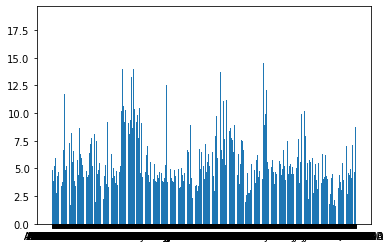

In [11]:
workload=df.groupby(['course'])['time'].mean()
workload=workload.reset_index()
plt.bar(workload.course, workload.time)

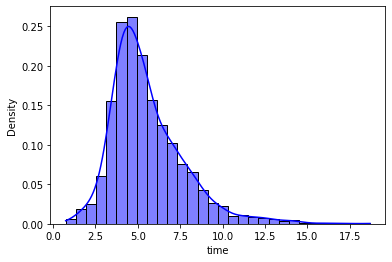

In [13]:
sns.set_palette("hls")
sns.histplot(workload.time,stat="density",color="blue",bins=30,kde=True)
plt.show()

we can see that for most of courses, the weekly workload is between 2.5~8 hours, so if one would like to take more stressful courses, then the following courses(group by departments) can be taken into consideration(top 6)

In [14]:
heavy_wkload = df[df['time']>8]
heavy_wkload.groupby(['department','course'])['time'].count()

department  course   
ANTH        ANTH 21       1
AWP         AWP 1        13
            AWP 2A        1
            AWP 2B       16
BENG        BENG 103B     3
                         ..
VIS         VIS 183A      1
            VIS 185       1
            VIS 60        1
            VIS 80        3
WCWP        WCWP 100      6
Name: time, Length: 503, dtype: int64

<BarContainer object of 10 artists>

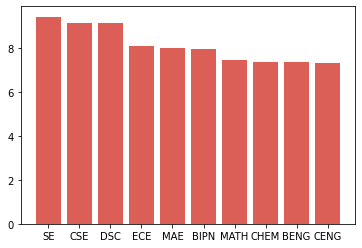

In [15]:
"""
group by department
"""
top_wkload = df.groupby('department').mean().sort_values('time', ascending=False)[0:10]
top_wkload = top_wkload.reset_index()
plt.bar(top_wkload.department,top_wkload.time)

LTCS


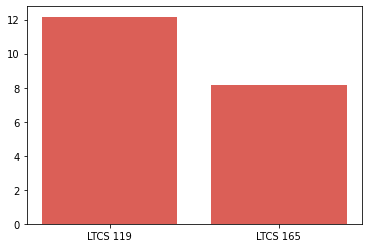

DSC


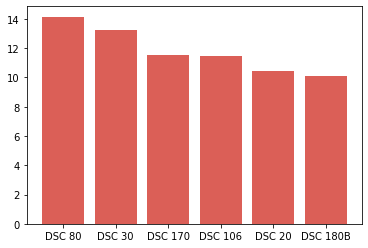

ETHN


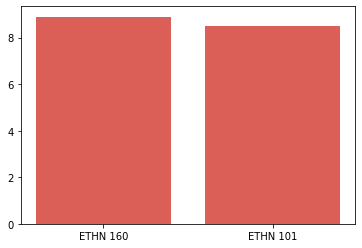

LTSP


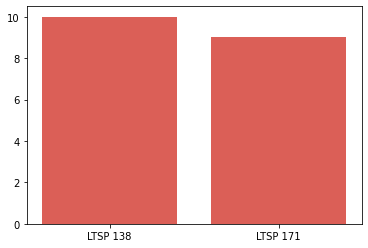

BENG


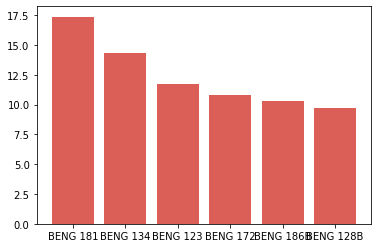

MGT


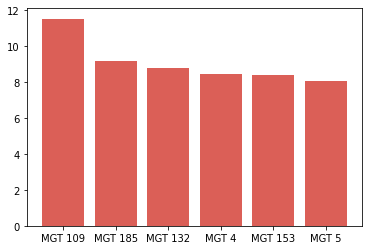

MAE


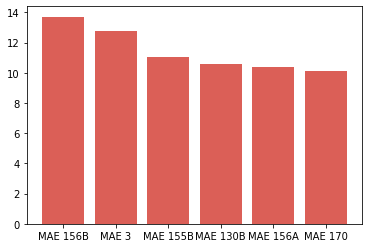

BICD


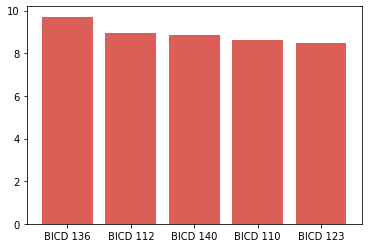

LIGN


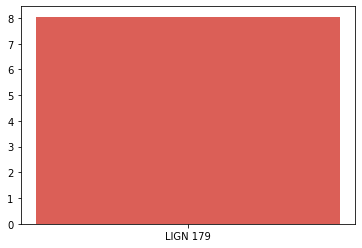

BIPN


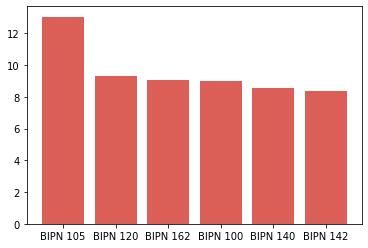

LTLA


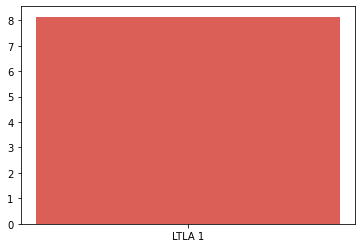

ECON


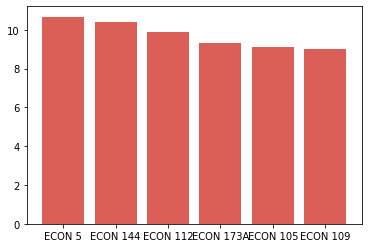

HUM


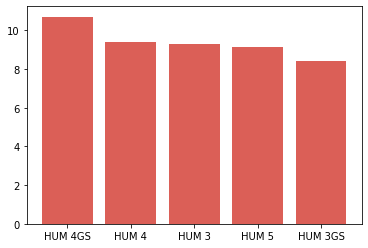

ECE


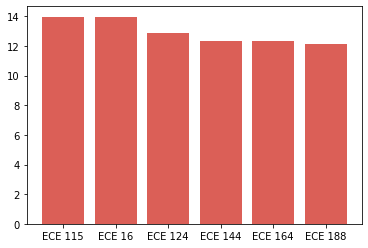

VIS


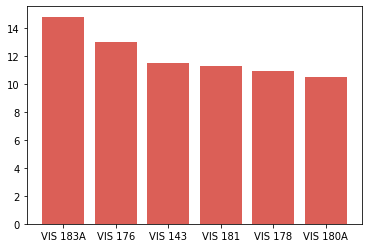

LTWL


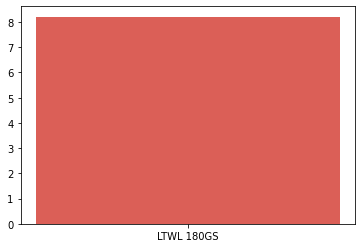

COMM


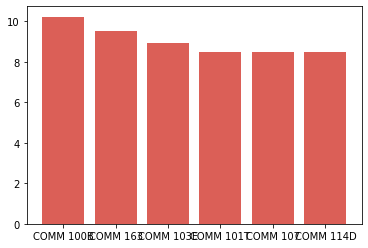

CHIN


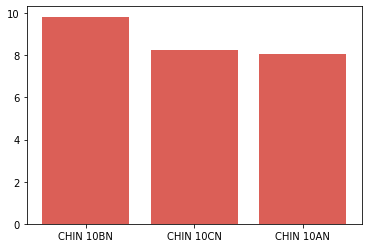

LTEN


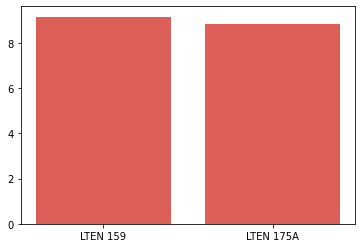

HDS


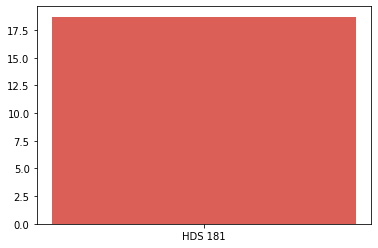

PHYS


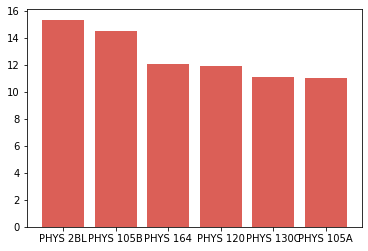

MATH


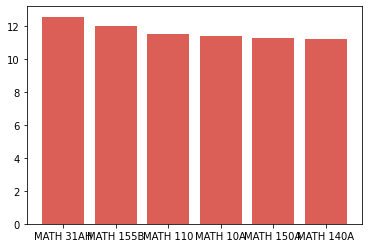

AWP


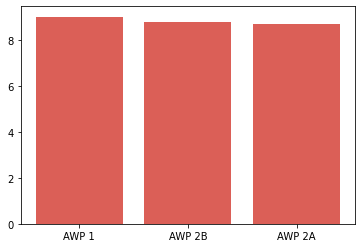

BIBC


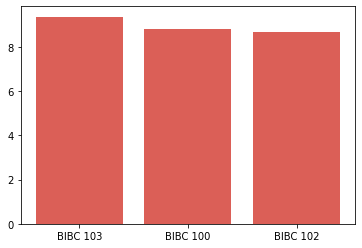

COGS


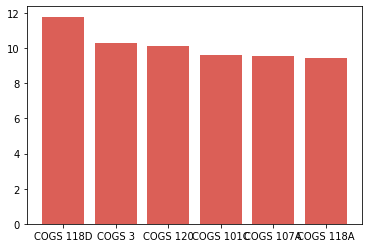

DOC


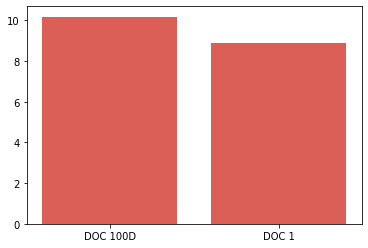

LTEA


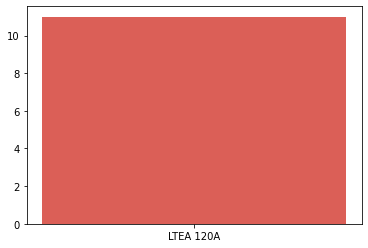

EDS


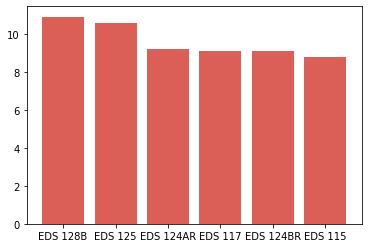

POLI


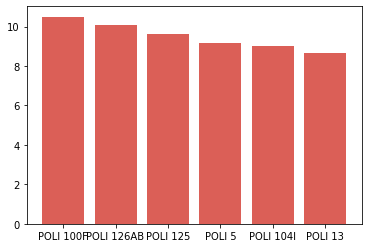

SOCI


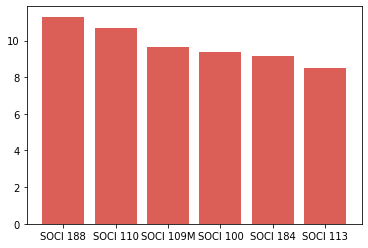

TDHT


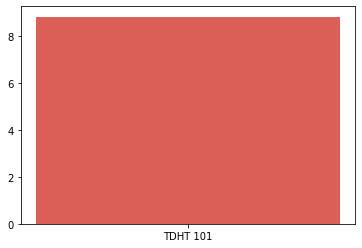

CSE


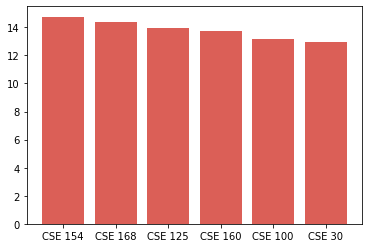

LATI


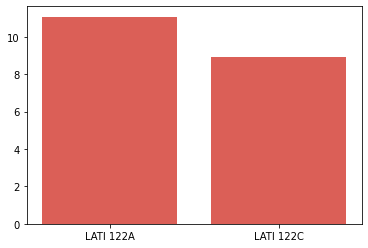

BIMM


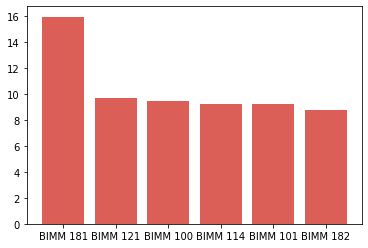

USP


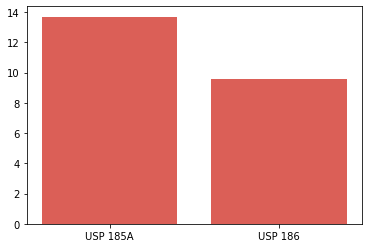

NANO


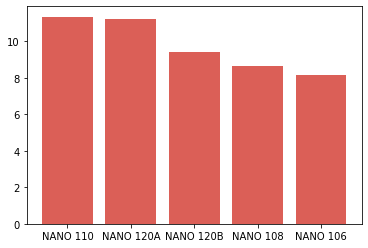

CHEM


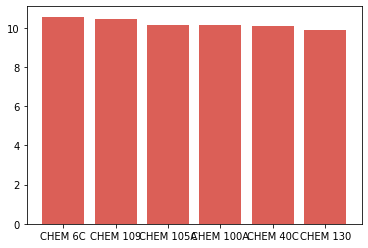

HDP


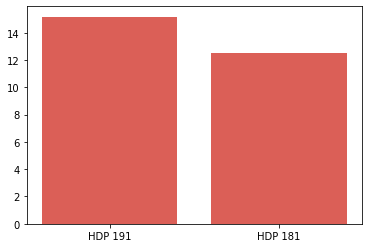

HILD


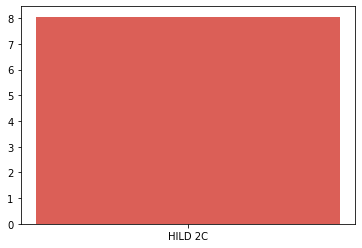

WCWP


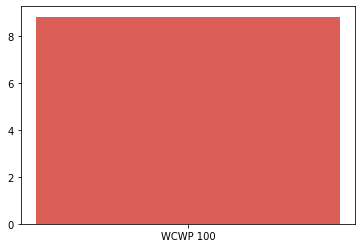

LTTH


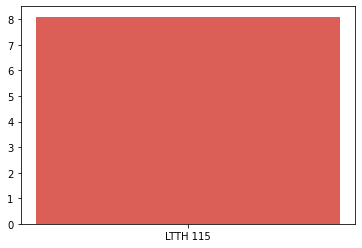

PHIL


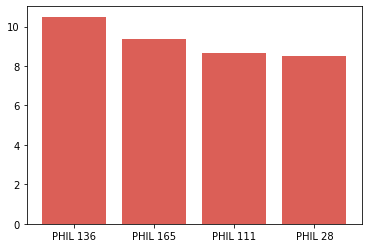

HIUS


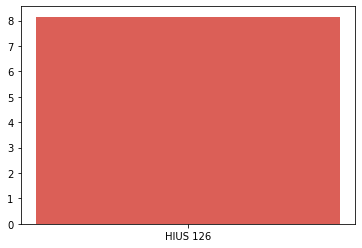

HIEU


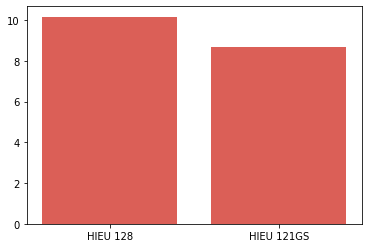

MMW


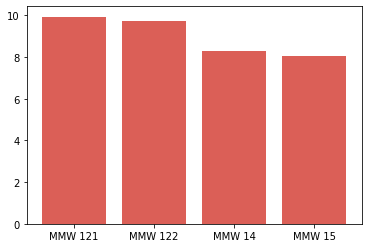

BILD


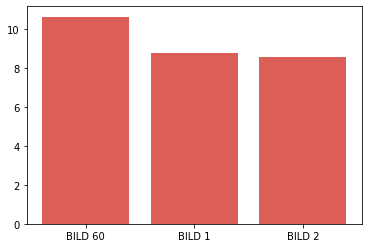

ESYS


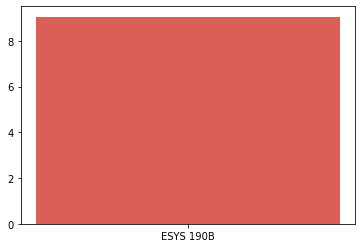

CENG


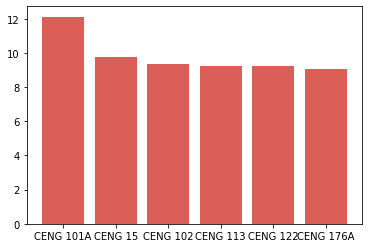

ENG


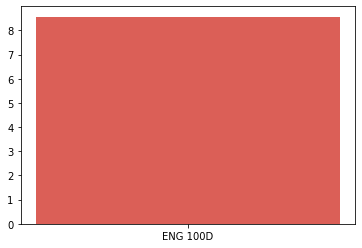

BIEB


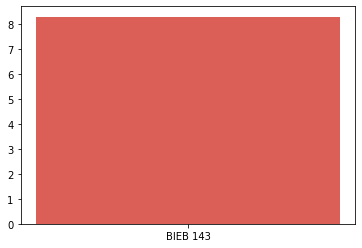

PSYC


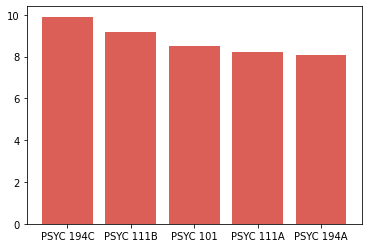

INTL


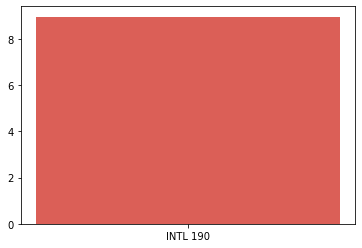

LTAM


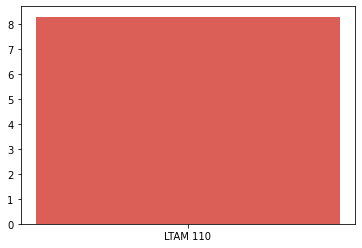

SE


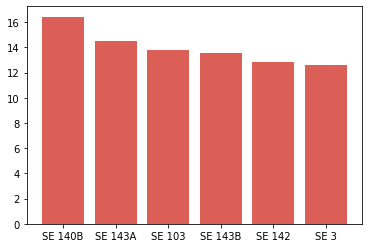

ANTH


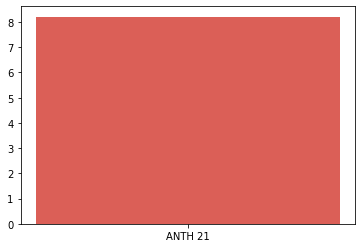

FMPH


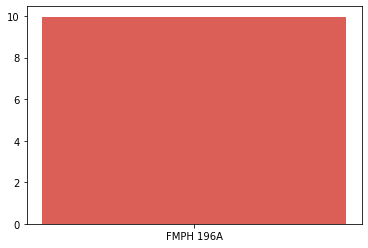

SIO


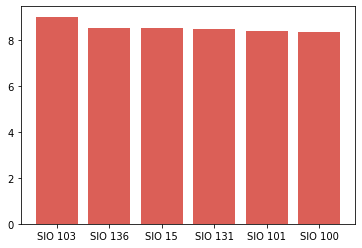

MUS


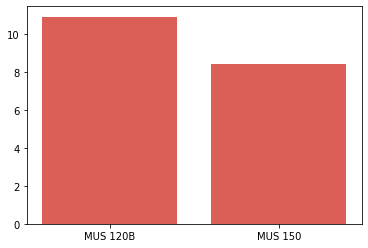

In [16]:
for dep in set(heavy_wkload['department'].values):
    heavy_wkload_0 = heavy_wkload[heavy_wkload['department'] == dep].groupby('course').mean().sort_values('time', ascending=False)[0:6]
    heavy_wkload_0=heavy_wkload_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(heavy_wkload_0.course, heavy_wkload_0.time)
    plt.show()
    

and the following courses would have less workloads

In [17]:
easy_wkload = df[df['time']<2.5]
easy_wkload.groupby(['department','course'])['time'].count()

department  course   
ANAR        ANAR 158     1
ANSC        ANSC 101     1
            ANSC 106     2
            ANSC 178     1
ANTH        ANTH 21      1
                        ..
USP         USP 161      1
            USP 180      1
VIS         VIS 10       1
            VIS 126AN    1
            VIS 175      1
Name: time, Length: 148, dtype: int64

<BarContainer object of 10 artists>

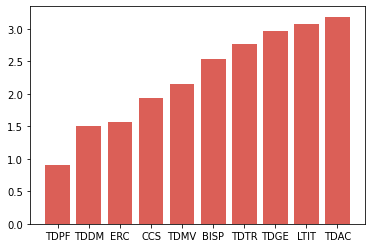

In [18]:
"""
group by department
"""
top_less_wkload = df.groupby('department').mean().sort_values('time', ascending=True)[0:10]
top_less_wkload = top_less_wkload.reset_index()
plt.bar(top_less_wkload.department,top_less_wkload.time)

CGS


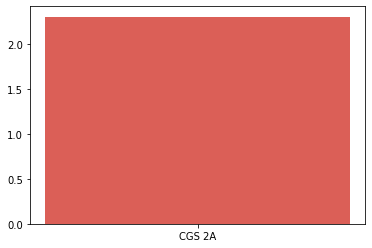

ETHN


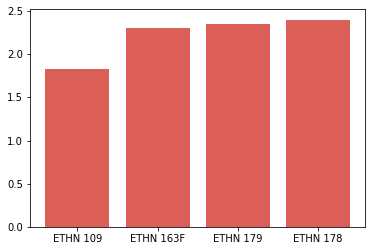

ERC


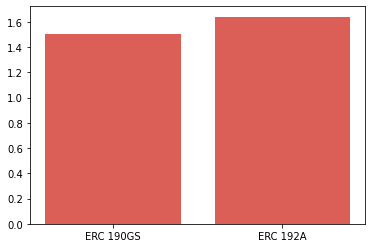

CCS


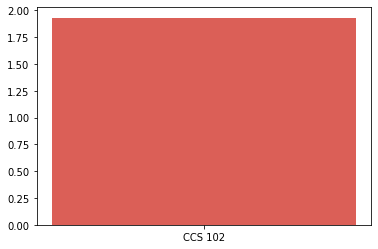

BENG


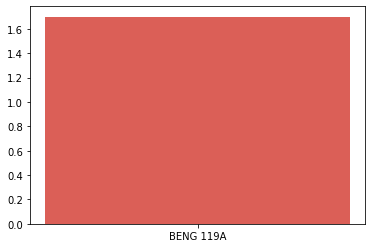

BISP


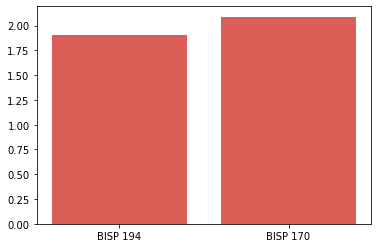

MGT


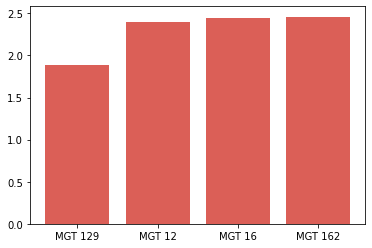

LIGN


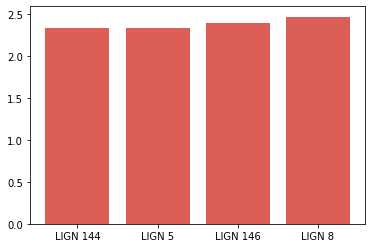

TDGE


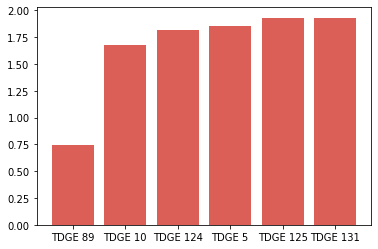

BICD


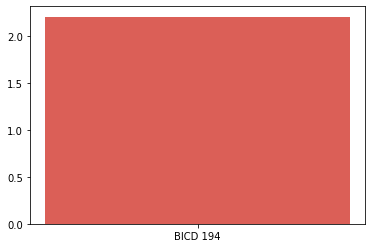

ENVR


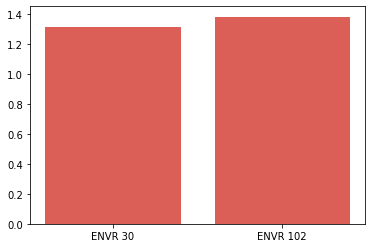

VIS


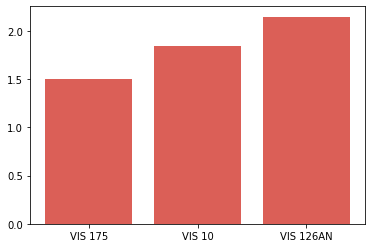

ECON


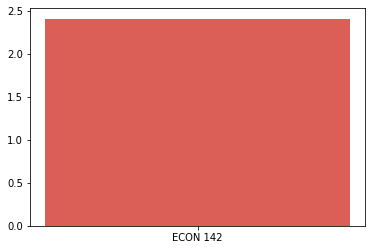

TDPF


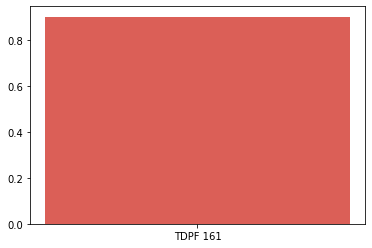

LTWL


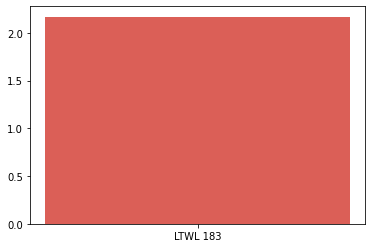

COMM


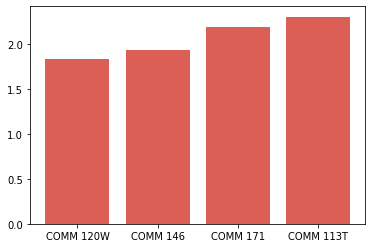

LTEU


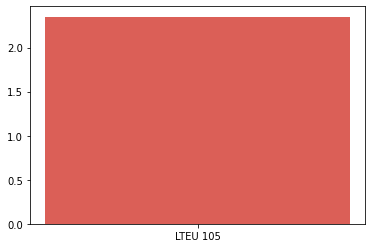

MATH


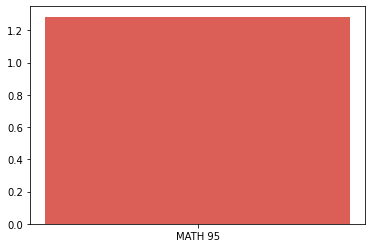

TDMV


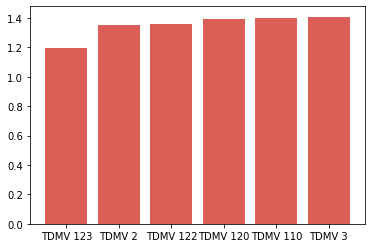

COGS


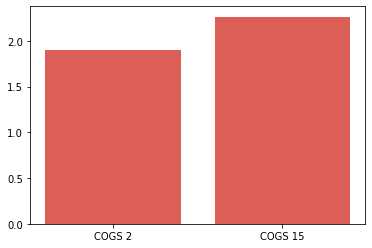

HISC


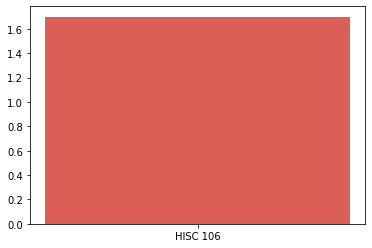

BIBC


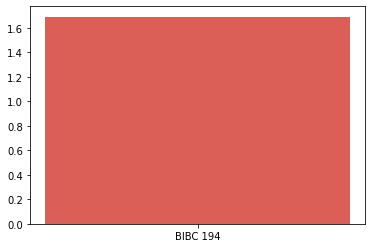

EDS


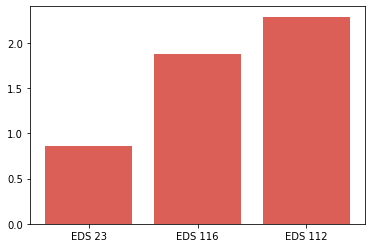

SOCI


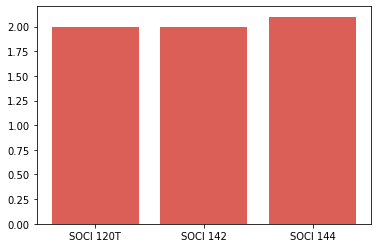

POLI


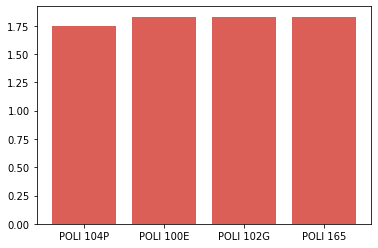

TDDM


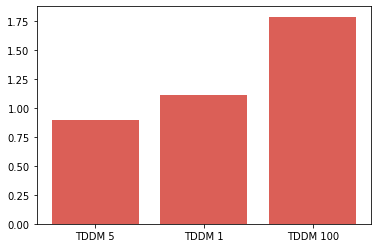

TDHT


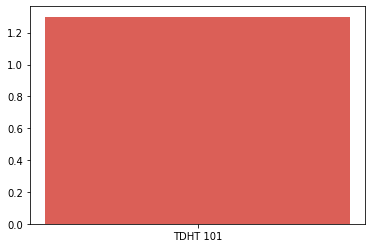

CSE


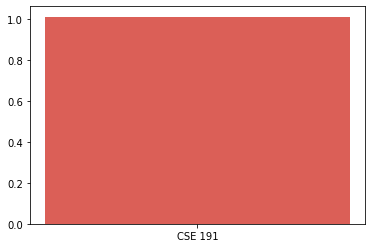

TDTR


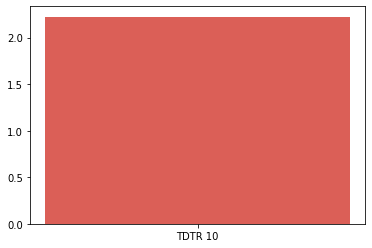

LATI


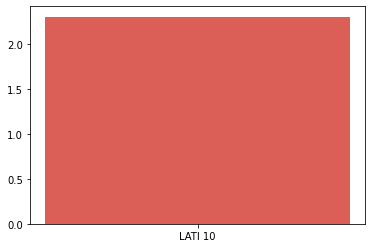

BIMM


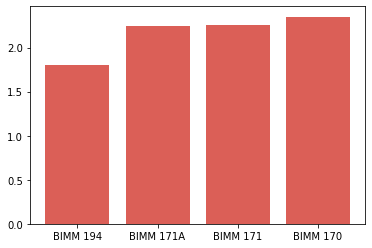

USP


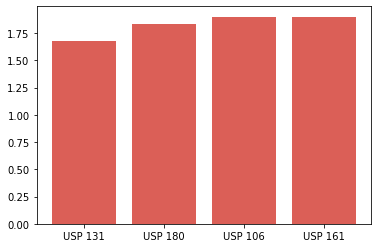

ANSC


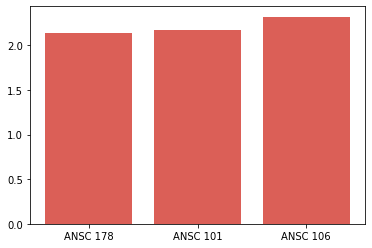

TDAC


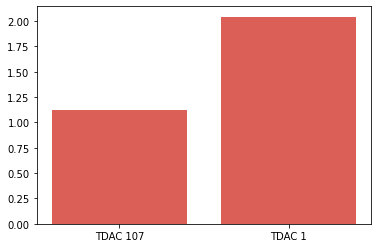

CHEM


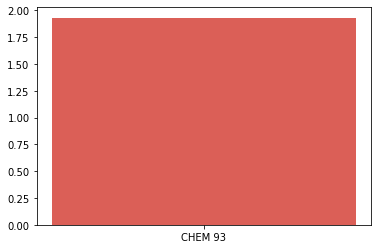

HDP


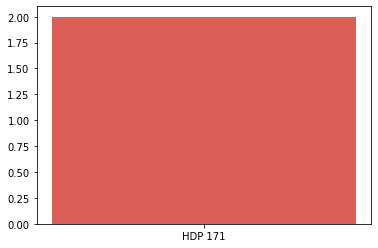

CAT


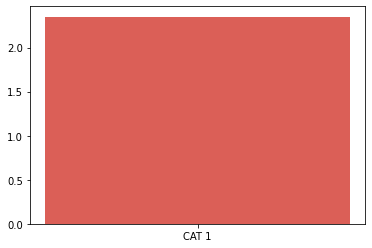

PHIL


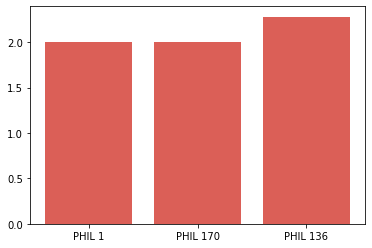

HIUS


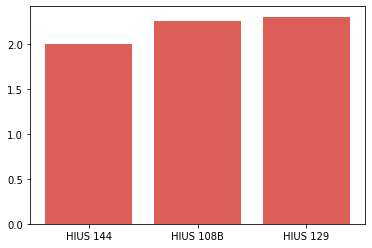

JAPN


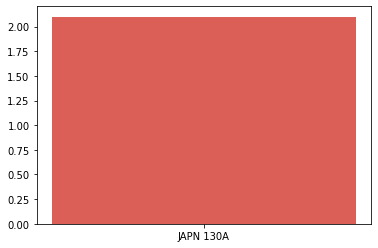

MMW


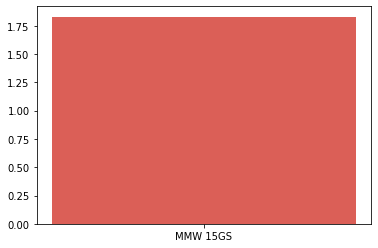

RELI


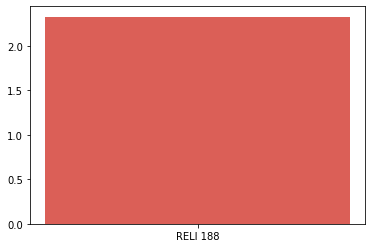

BILD


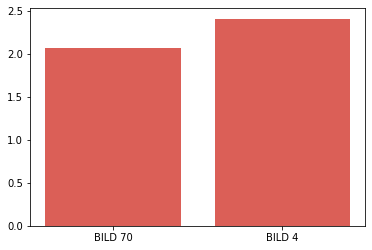

ENG


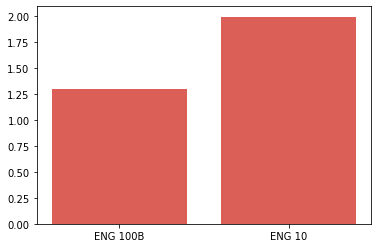

ANAR


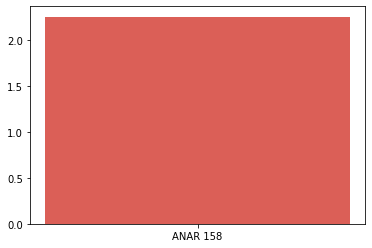

TDDR


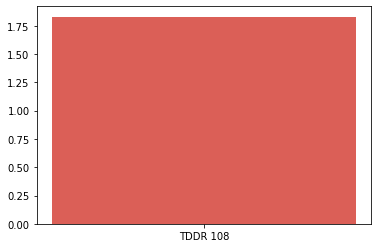

PSYC


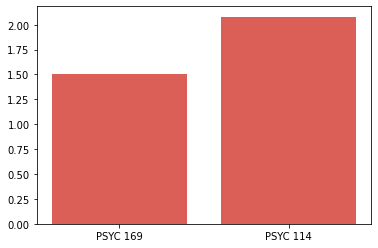

ANTH


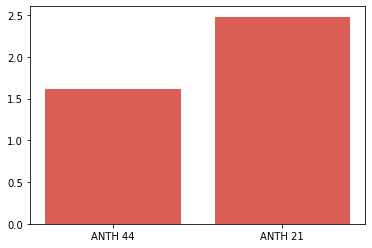

FMPH


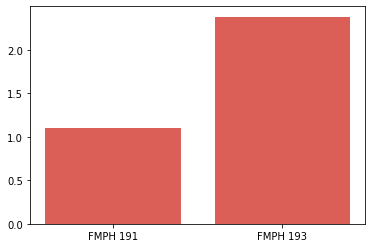

SIO


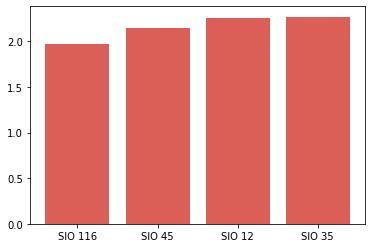

MUS


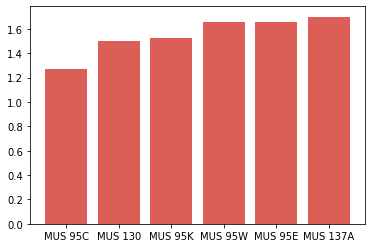

LIHL


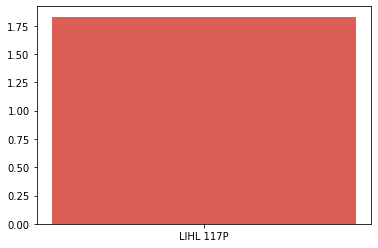

In [19]:
for dep in set(easy_wkload['department'].values):
    easy_wkload_0 = easy_wkload[easy_wkload['department'] == dep].groupby('course').mean().sort_values('time', ascending=True)[0:6]
    easy_wkload_0=easy_wkload_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(easy_wkload_0.course, easy_wkload_0.time)
    plt.show()

In [21]:
"""
Analysis on average gpa
"""
gpa_average = df.groupby(['course'])['gpa_actual'].mean()
gpa_average=gpa_average.reset_index()
top_df = df.groupby('department').mean().sort_values('gpa_actual', ascending=False).head(10) #top 10 gpa group by department
top_df = top_df.dropna()
top_df.head(10)

,Unnamed: 0,evals,rcmnd_class,rcmnd_instr,time,class_weighted_evals,instr_weighted_evals,gpa_expected,gpa_actual
department,,,,,,,,,
TDPF,9068.500000,6.000000,1.000000,0.800000,0.900000,6.000000,5.000000,4.000000,4.000000
LTIT,4756.000000,13.500000,1.000000,0.954500,3.070000,13.500000,13.000000,3.570000,3.990000
TDDM,5023.166667,15.166667,0.963333,0.961500,1.505000,14.833333,14.666667,3.893333,3.975000
BISP,4515.944444,17.111111,0.972500,0.962778,2.538889,16.666667,16.500000,3.926111,3.925556
TDMV,5789.816456,12.689873,0.975570,0.960348,2.143228,12.405063,12.259494,3.922342,3.901899
LTEU,4875.181818,13.090909,0.936000,0.983364,4.287273,12.454545,12.909091,3.780909,3.835455
TDTR,5819.333333,18.000000,0.984000,0.979778,2.757778,17.666667,17.666667,3.792222,3.818889
TDAC,5857.784946,11.505376,0.990323,0.975215,3.184946,11.419355,11.258065,3.909140,3.817204
TDPR,5818.111111,12.444444,0.893889,1.000000,5.287778,11.111111,12.444444,3.855556,3.811111


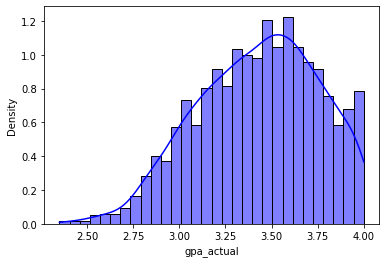

In [22]:
sns.set_palette("hls")
sns.histplot(gpa_average.gpa_actual,stat="density",color="blue",bins=30,kde=True)
plt.show()

In [23]:
#A class (A- ~ A+)
A_gpa = df[df['gpa_actual']>=3.7]
A_gpa.groupby(['department','course'])['gpa_actual'].count()

department  course   
AAS         AAS 10       1
ANAR        ANAR 100     1
            ANAR 114     1
            ANAR 135S    1
            ANAR 155     1
                        ..
VIS         VIS 41       2
            VIS 60       3
            VIS 80       1
            VIS 84       1
WCWP        WCWP 100     2
Name: gpa_actual, Length: 982, dtype: int64

LTGK


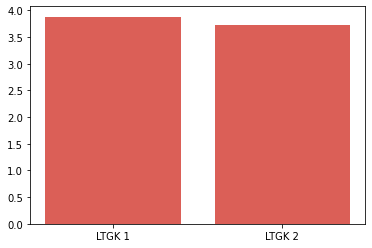

DSC


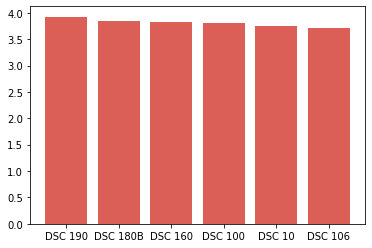

LTWR


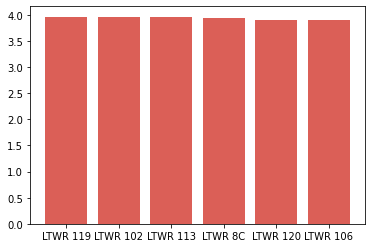

ECE


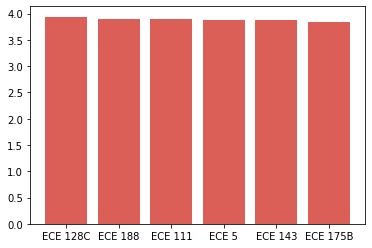

LTEN


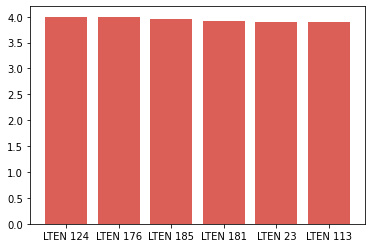

CHIN


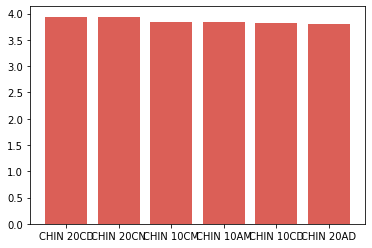

AWP


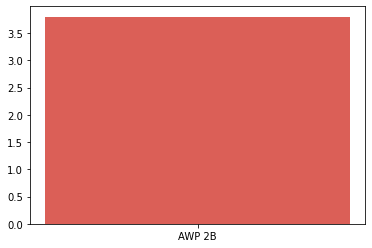

LTEA


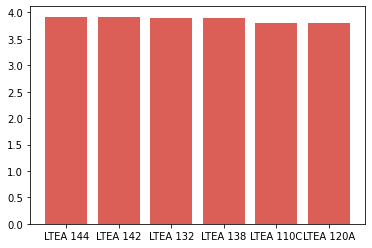

EDS


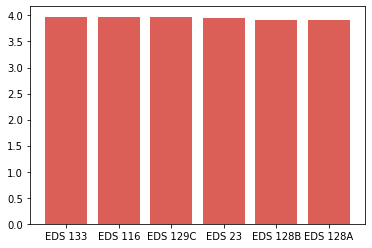

AAS


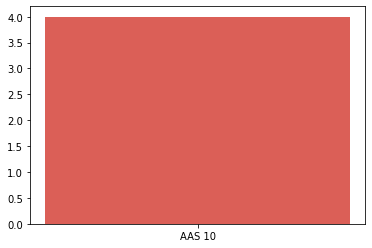

LATI


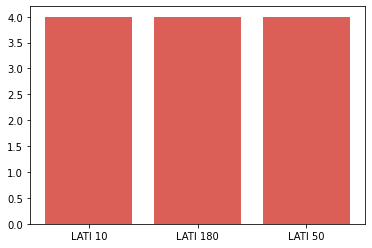

BIMM


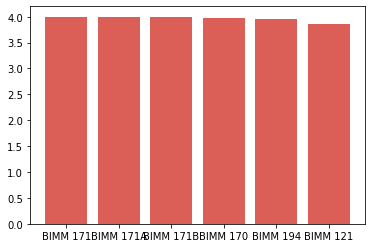

HDP


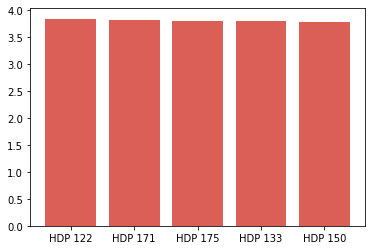

HILD


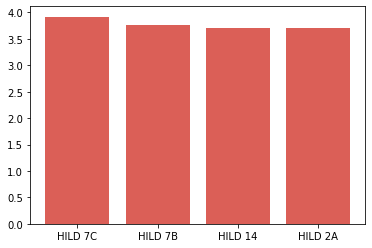

PHIL


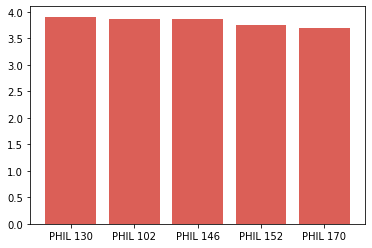

RELI


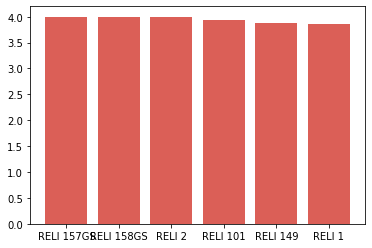

PSYC


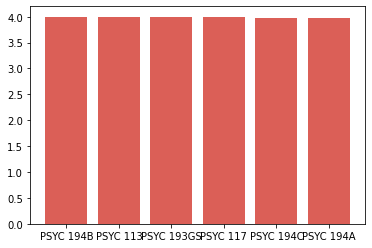

LTIT


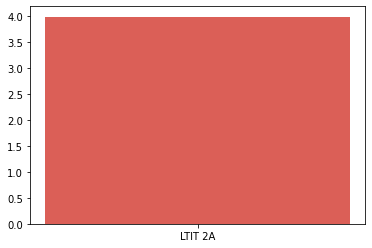

LTRU


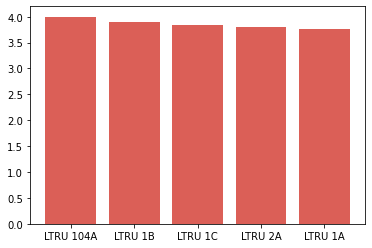

LTCS


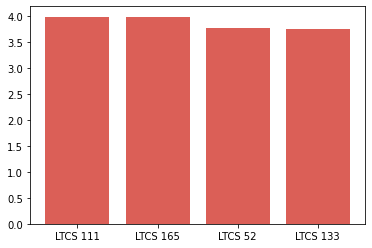

CGS


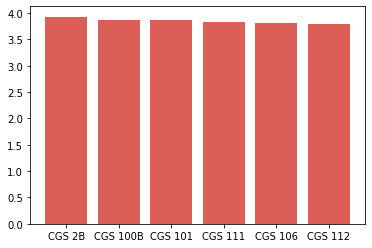

ETHN


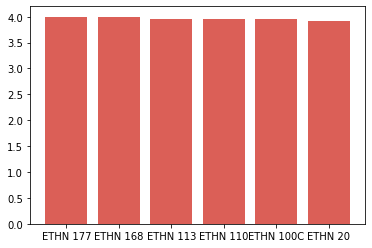

BENG


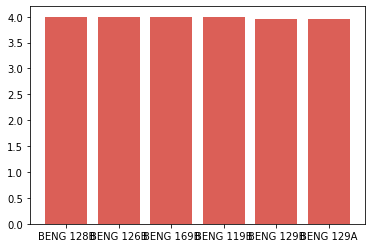

BISP


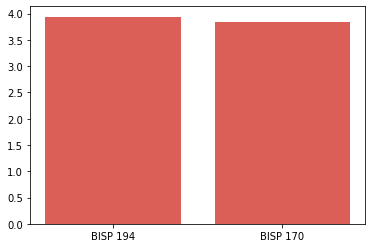

BICD


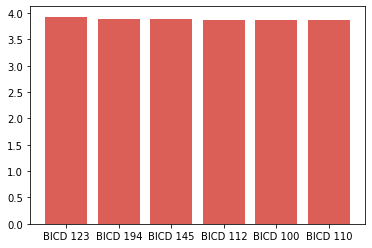

VIS


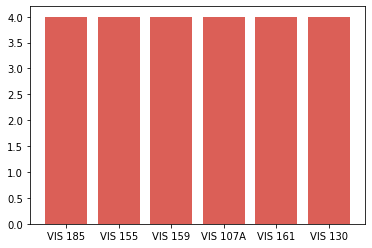

HUM


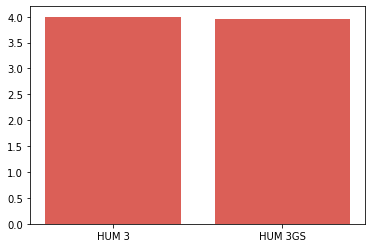

DSGN


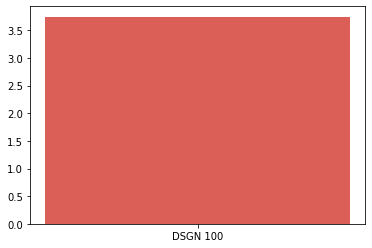

HINE


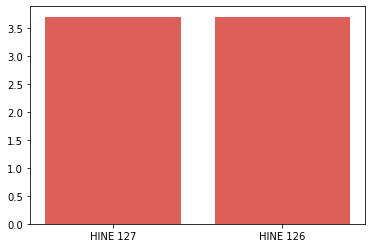

TDPR


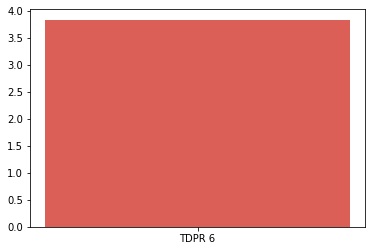

POLI


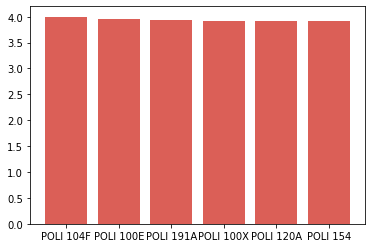

TDDM


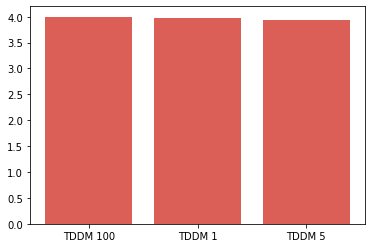

CSS


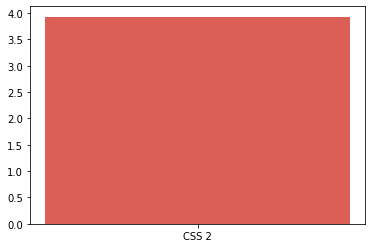

CSE


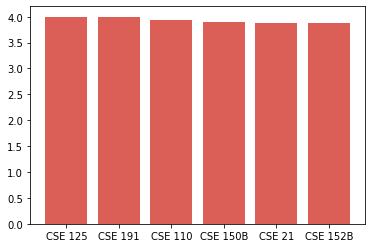

USP


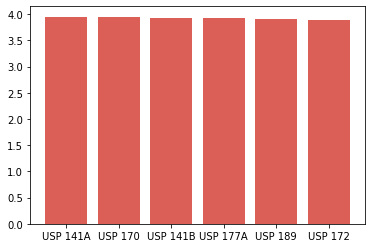

ANSC


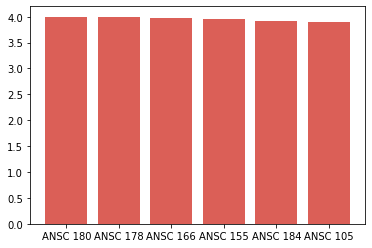

TDAC


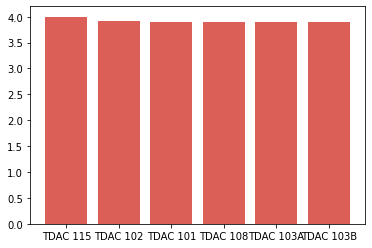

LTTH


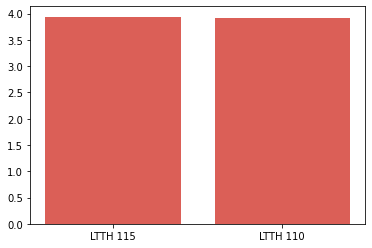

TDPW


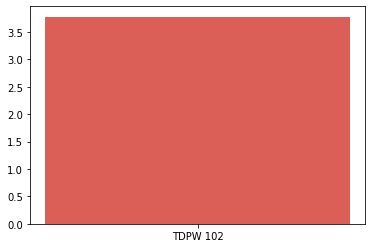

ENG


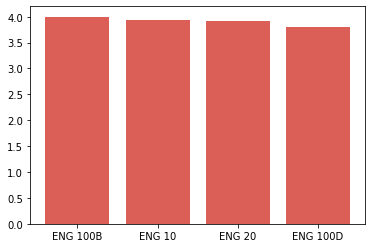

ANAR


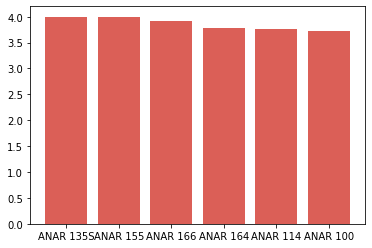

TDDR


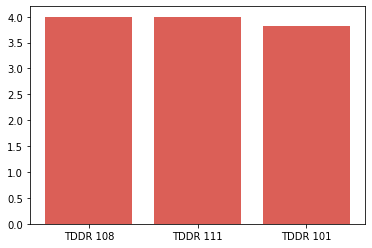

BIEB


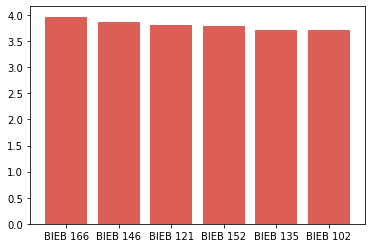

ANTH


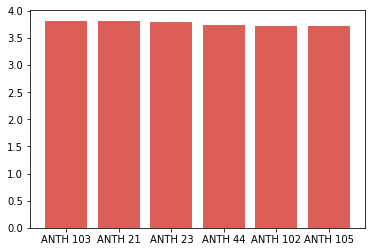

ERC


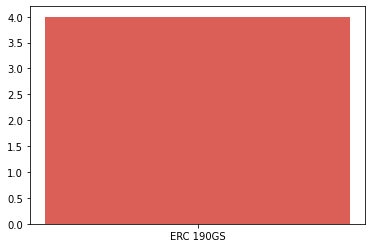

LTSP


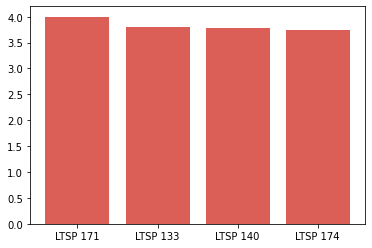

TWS


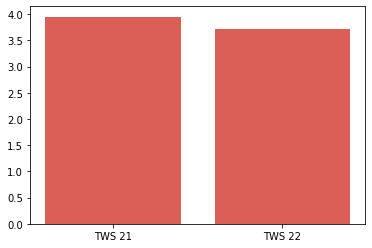

HILA


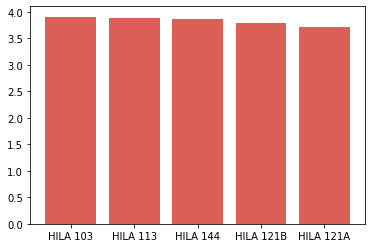

LTCH


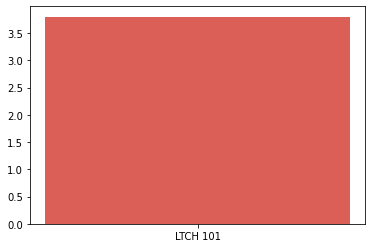

MGT


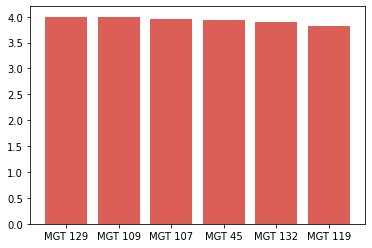

BIPN


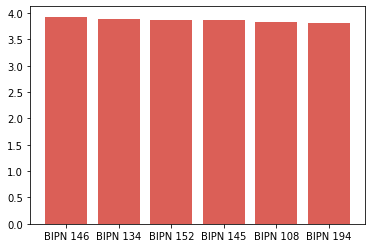

LTLA


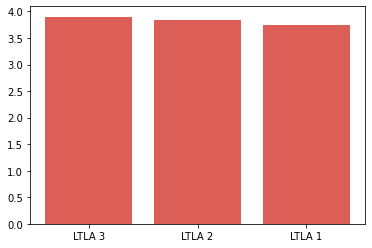

ENVR


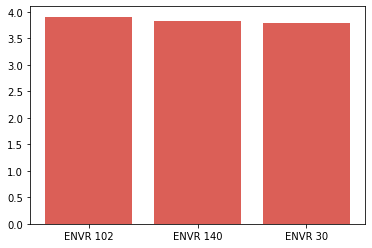

ANBI


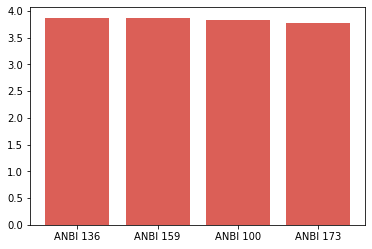

HDS


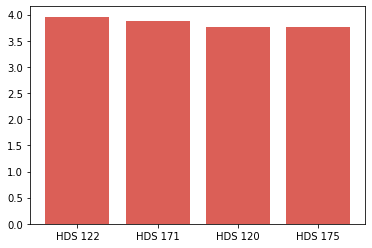

GLBH


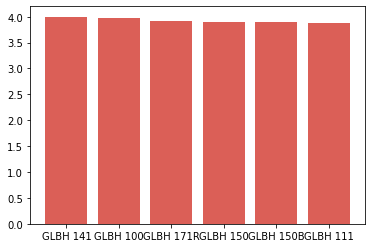

DOC


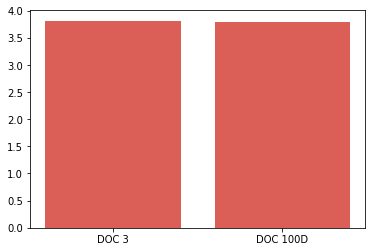

TDHT


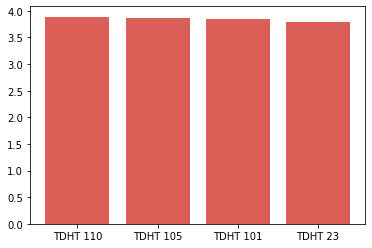

CHEM


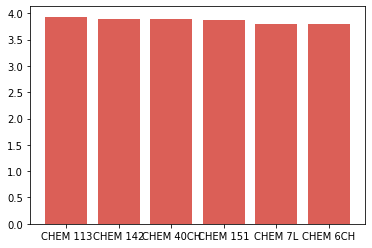

HIUS


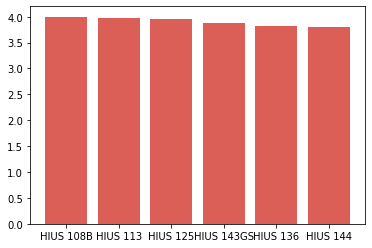

HIEU


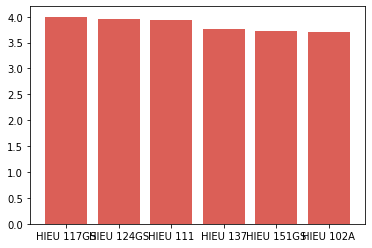

JAPN


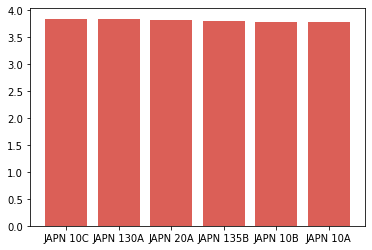

MMW


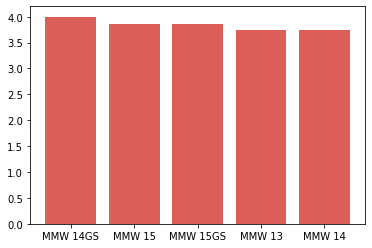

HIEA


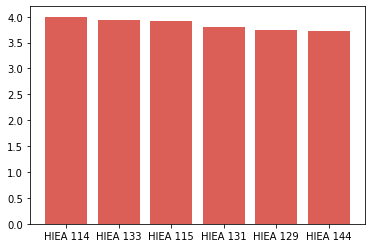

BILD


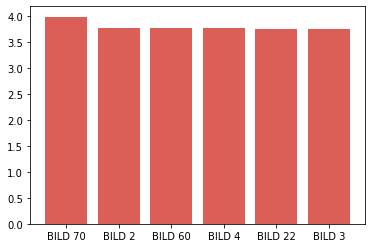

ESYS


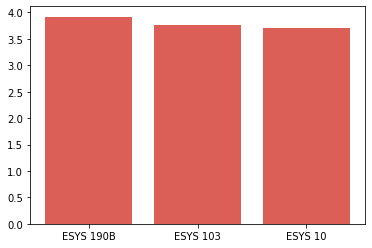

CENG


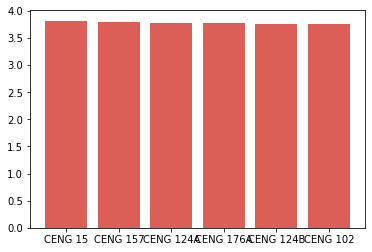

SE


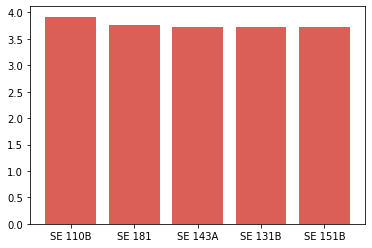

LTFR


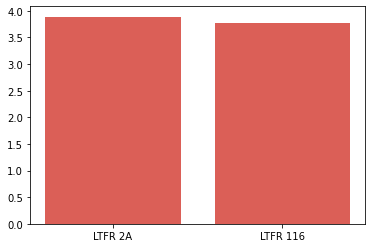

SIO


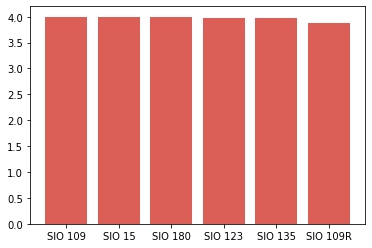

MUS


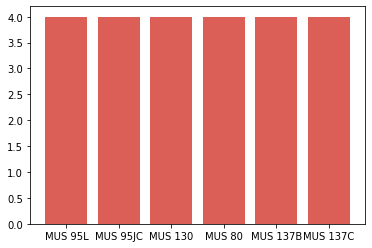

LIHL


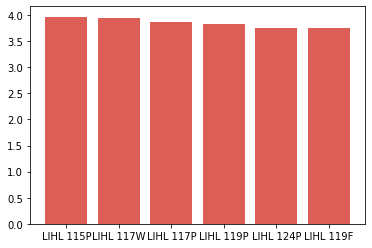

HIAF


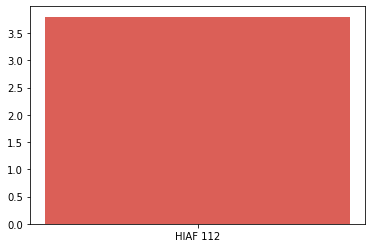

LIGN


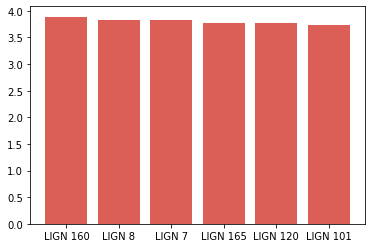

MAE


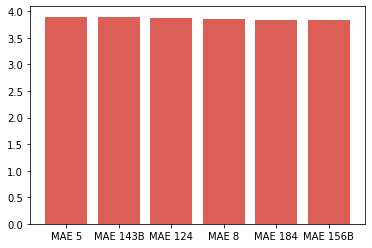

TDGE


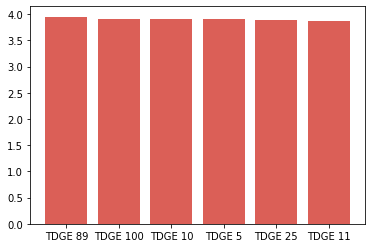

TDPF


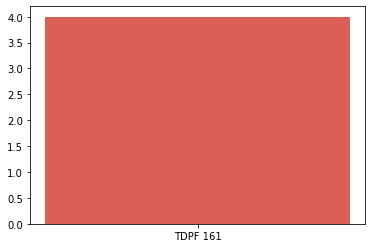

LTWL


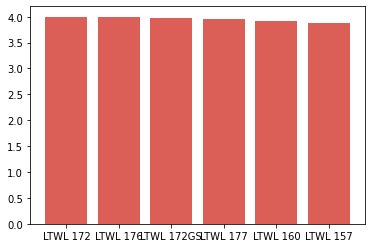

COMM


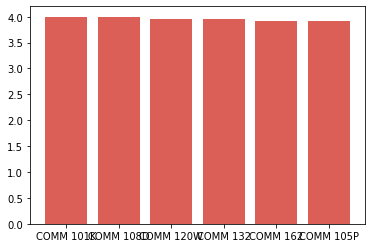

LTKO


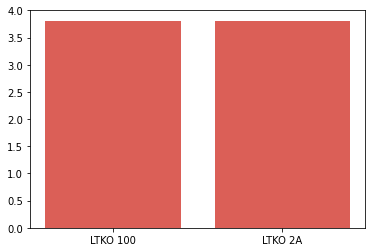

PHYS


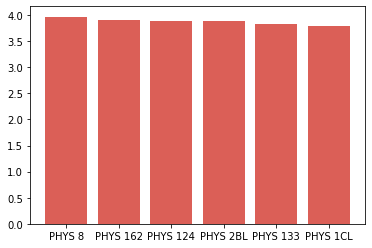

LTEU


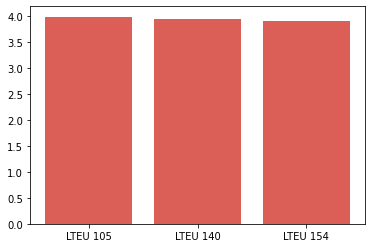

MATH


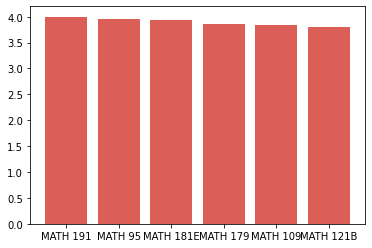

COGS


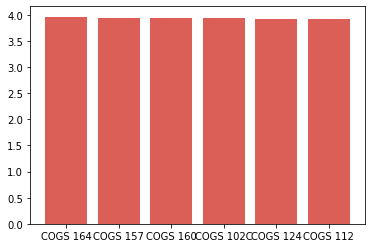

TDMV


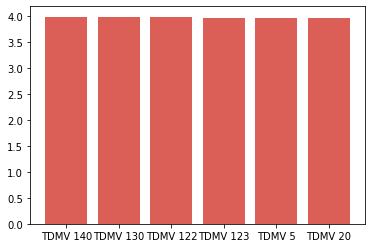

HISC


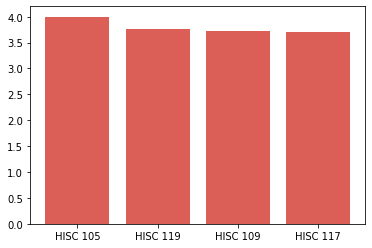

BIBC


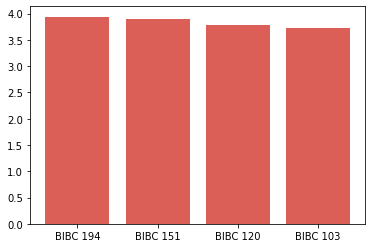

SOCI


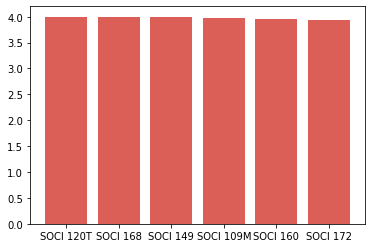

TDTR


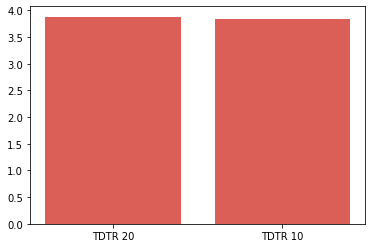

NANO


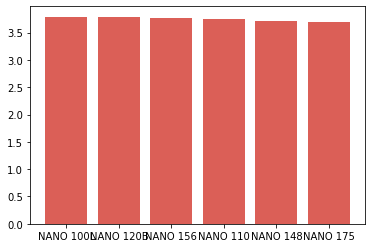

WCWP


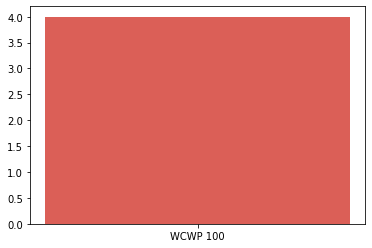

CAT


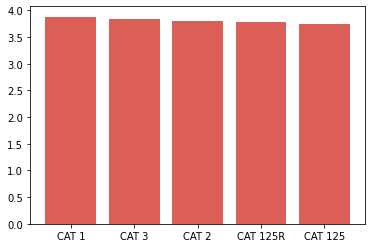

HITO


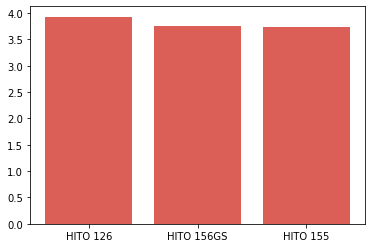

LTAM


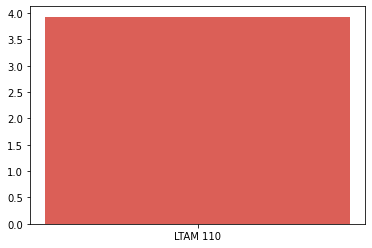

INTL


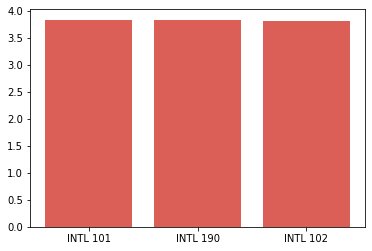

FMPH


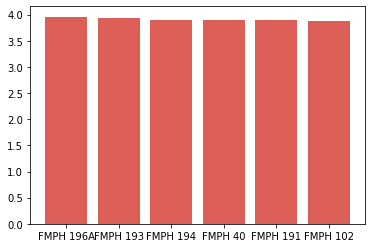

In [25]:
for dep in set(A_gpa['department'].values):
    A_gpa_0 = A_gpa[A_gpa['department'] == dep].groupby('course').mean().sort_values('gpa_actual', ascending=False)[0:6]
    A_gpa_0=A_gpa_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(A_gpa_0.course, A_gpa_0.gpa_actual)
    plt.show()

## Analysis of learning efficiency(ratio of gpa and workload)

In [26]:
"""
correlations
"""
learning_efficient = df[['department','course','time','gpa_actual']]
learning_efficient.head(10)

,department,course,time,gpa_actual
0,DSC,DSC 10,7.07,3.44
1,ECE,ECE 100,9.41,3.04
2,EDS,EDS 115,5.07,3.89
3,EDS,EDS 117,6.21,3.94
4,EDS,EDS 125,10.64,3.88
5,MATH,MATH 2,9.21,3.10
6,MATH,MATH 3C,7.29,3.12
7,MATH,MATH 3C,8.25,2.87
8,MATH,MATH 3C,6.99,3.13
9,ANSC,ANSC 166,4.34,3.98


In [27]:
general_cor = learning_efficient[['time','gpa_actual']].corr()
general_cor

,time,gpa_actual
time,1.000000,-0.347302
gpa_actual,-0.347302,1.000000


In [29]:
"""
by department
"""
from math import isnan
cor_list = {}
for dep in set(learning_efficient['department'].values):
    general_cor = learning_efficient[learning_efficient['department'] == dep][['time','gpa_actual']].corr()
    cor_list[dep] = general_cor.iloc[1,0]
cor_list = {k: v for k, v in cor_list.items() if not isnan(v)}
cor_list

{'LTGK': 0.05871807911169565,
 'DSC': -0.307582830434103,
 'LTWR': -0.0612138931066689,
 'ECON': -0.1160673365792393,
 'ECE': -0.1734020264465402,
 'LTEN': 0.164642318596205,
 'CHIN': -0.42793779945887817,
 'AWP': -0.2866481455837244,
 'LTEA': -0.28492510136057175,
 'EDS': -0.09504457809258655,
 'AAS': 1.0,
 'LATI': -0.004694359509883636,
 'BIMM': -0.4672309209902574,
 'HDP': -0.8806681538940334,
 'HILD': -0.25657778174681434,
 'PHIL': 0.0482333093135116,
 'RELI': 0.37432430140853074,
 'PSYC': -0.03190539809491433,
 'LTIT': 0.999999999999989,
 'LTRU': -0.5216807735160524,
 'TDDE': -0.6043922011888941,
 'LTCS': 0.3234893382446473,
 'CGS': -0.4873962426198348,
 'ETHN': -0.18094988378600557,
 'BENG': -0.31306587455518764,
 'BISP': -0.19378243078359003,
 'BICD': -0.3028149203887552,
 'HUM': -0.11188016319840127,
 'VIS': -0.05122401211976247,
 'DSGN': 0.369921855126055,
 'HINE': -0.1822243503430821,
 'TDPR': -0.07895246639337707,
 'POLI': -0.15483275675693442,
 'TDDM': -0.2978574293663779,


<BarContainer object of 12 artists>

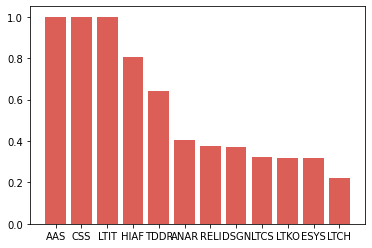

In [30]:
"""
select the most positive correlation departments, in which your gpa could better reflect your efforts
"""
top_positive_corr = {k: v for k, v in sorted(cor_list.items(), key=lambda item: item[1], reverse = True) if v > 0.2}
plt.bar(top_positive_corr.keys(),top_positive_corr.values())


In [31]:
"""
analysis the ratio of hours and gpas --> time / gpa_actual
"""
gh_ratio = learning_efficient.copy()
gh_ratio['ratio'] = gh_ratio['gpa_actual']/ gh_ratio['time']
gh_ratio = gh_ratio.dropna()
gh_ratio.head(10)

,department,course,time,gpa_actual,ratio
0,DSC,DSC 10,7.07,3.44,0.486563
1,ECE,ECE 100,9.41,3.04,0.323061
2,EDS,EDS 115,5.07,3.89,0.767258
3,EDS,EDS 117,6.21,3.94,0.634461
4,EDS,EDS 125,10.64,3.88,0.364662
5,MATH,MATH 2,9.21,3.10,0.336591
6,MATH,MATH 3C,7.29,3.12,0.427984
7,MATH,MATH 3C,8.25,2.87,0.347879
8,MATH,MATH 3C,6.99,3.13,0.447783
9,ANSC,ANSC 166,4.34,3.98,0.917051


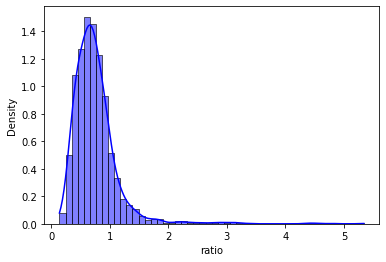

In [32]:
ratio_average = gh_ratio.groupby(['course'])['ratio'].mean()
ratio_average=ratio_average.reset_index()
sns.set_palette("hls")
sns.histplot(ratio_average.ratio,stat="density",color="b",bins=50,kde=True)
plt.show()

we can see for most of courses, you can achieve 0.4~1.0 point of gpa per learning hour per week, then we want to choose the ones having higher efficient for obtaining gpa.

LTGK


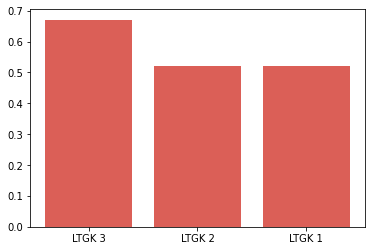

DSC


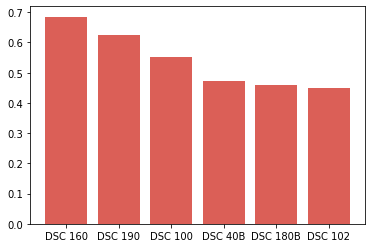

LTWR


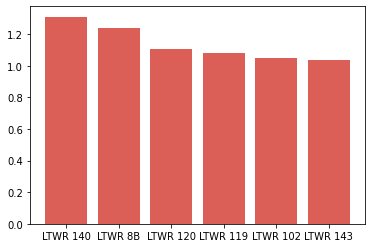

ECON


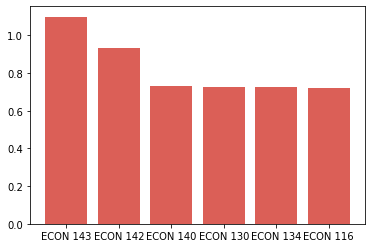

ECE


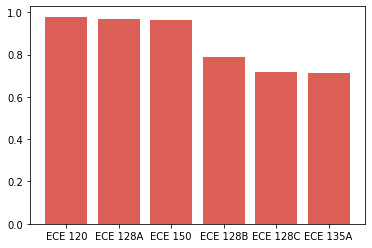

LTEN


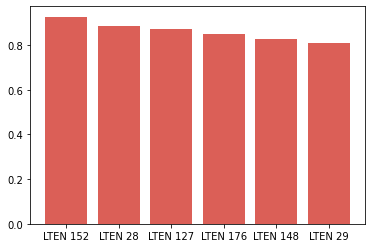

CHIN


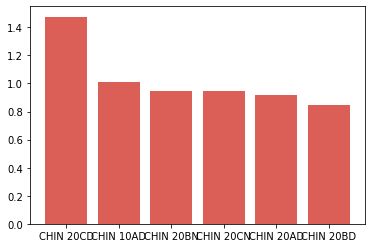

AWP


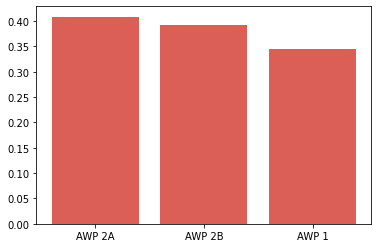

LTEA


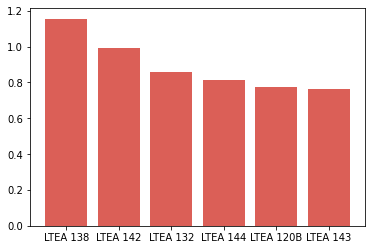

EDS


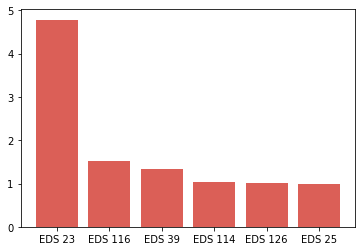

AAS


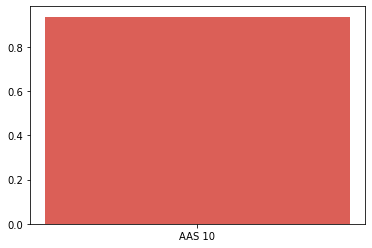

LATI


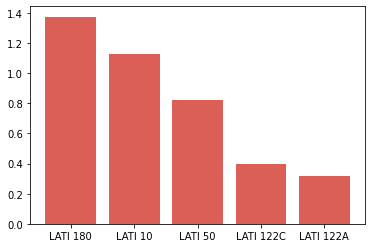

BIMM


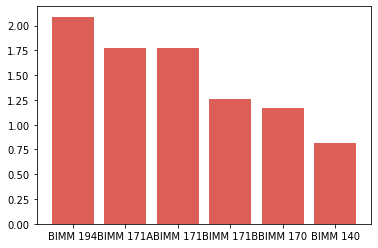

HDP


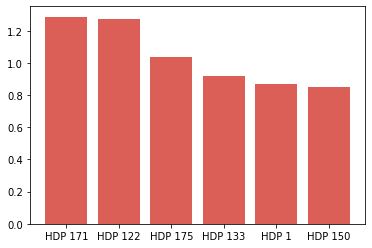

HILD


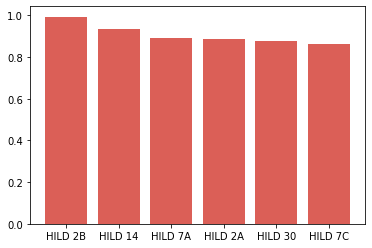

PHIL


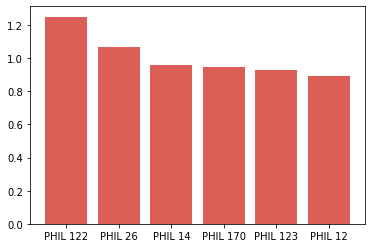

RELI


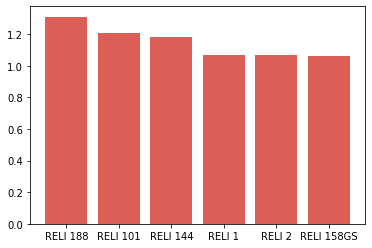

PSYC


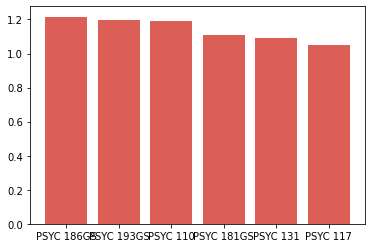

LTIT


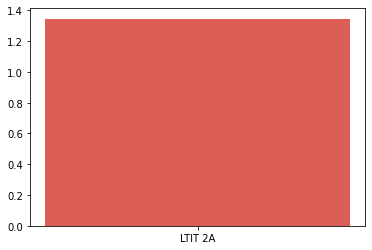

LTRU


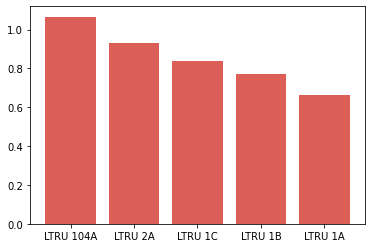

TDDE


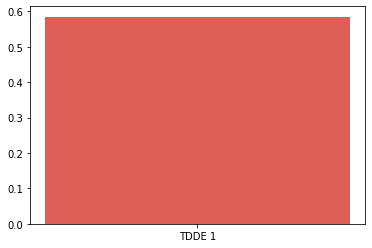

LTCS


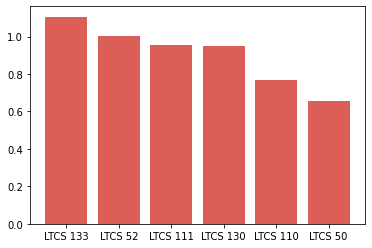

CGS


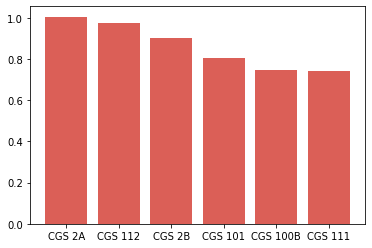

ETHN


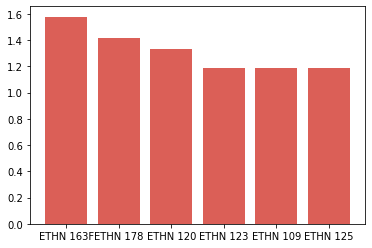

BENG


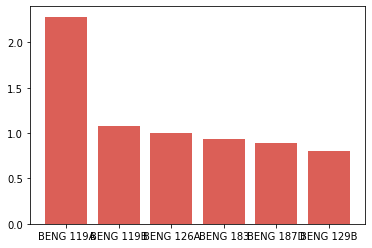

BISP


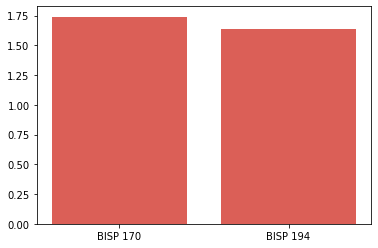

BICD


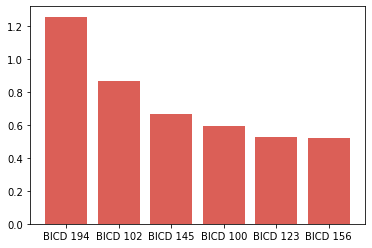

HUM


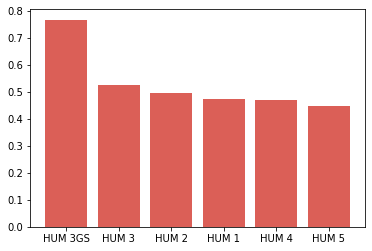

VIS


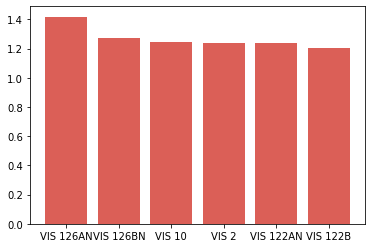

DSGN


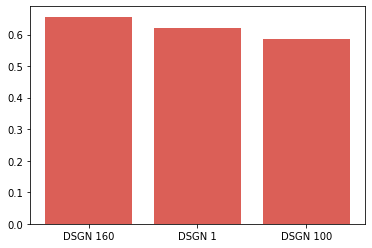

HINE


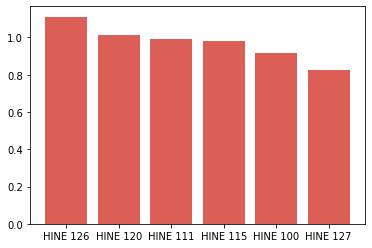

TDPR


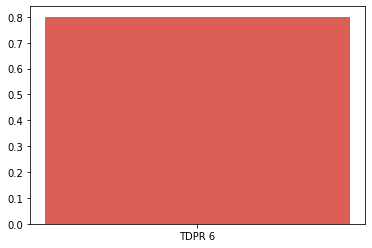

POLI


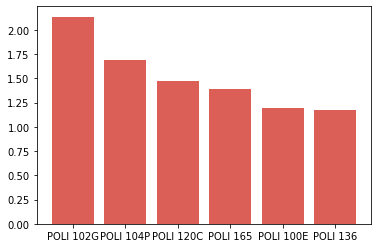

TDDM


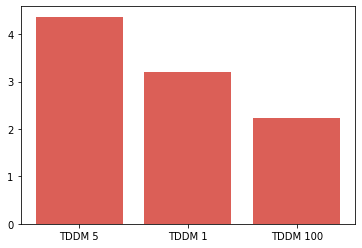

CSS


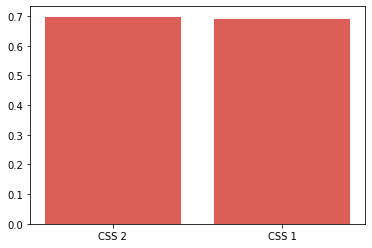

CSE


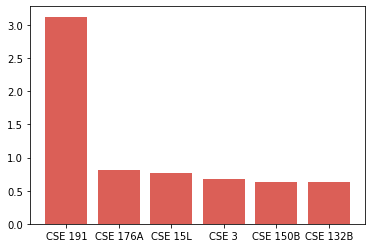

USP


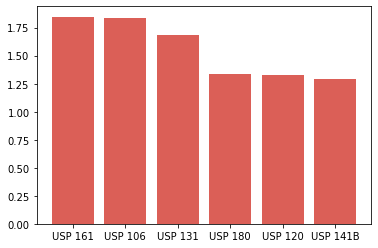

ANSC


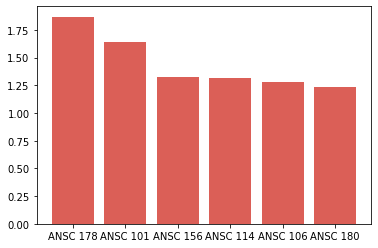

TDAC


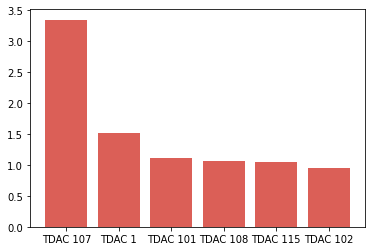

LTTH


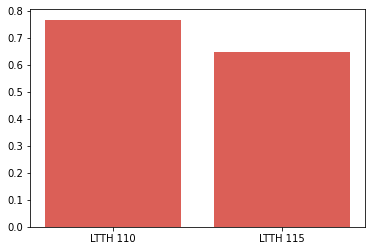

TDPW


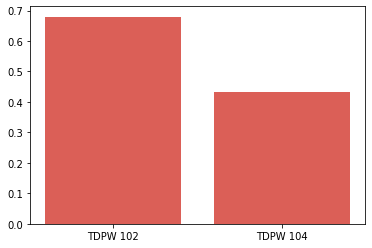

ENG


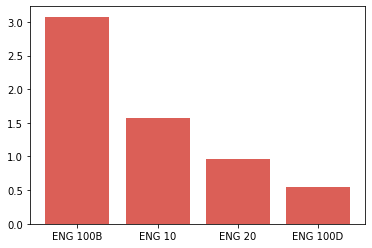

ANAR


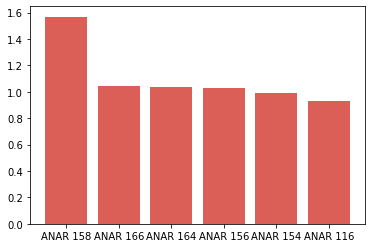

TDDR


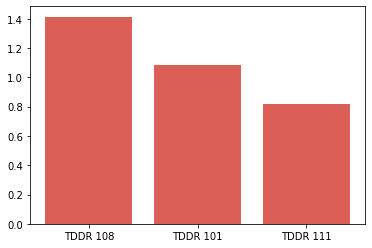

BIEB


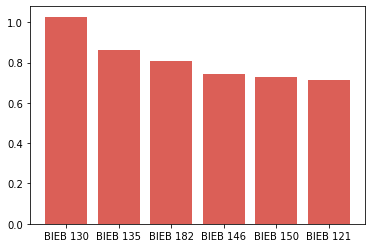

ANTH


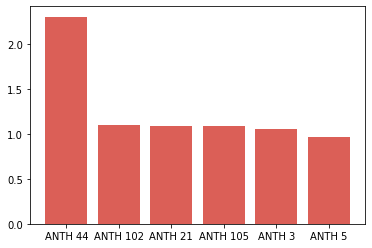

LTGM


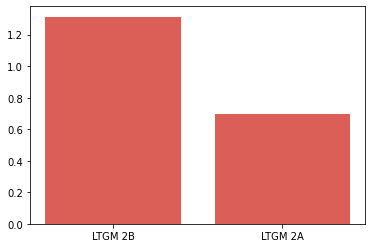

ERC


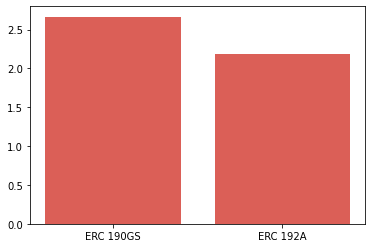

LTSP


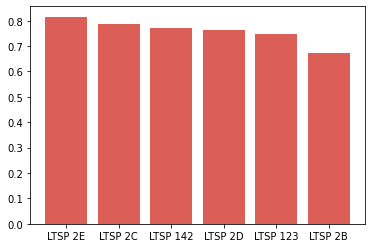

TWS


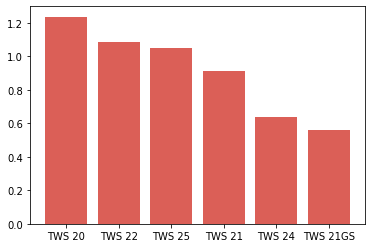

HILA


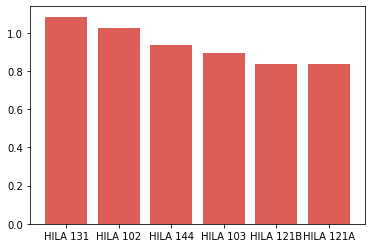

CCS


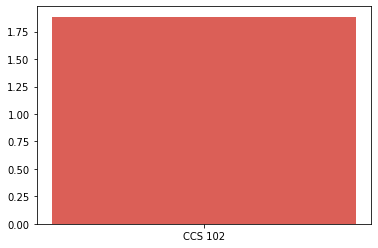

LTCH


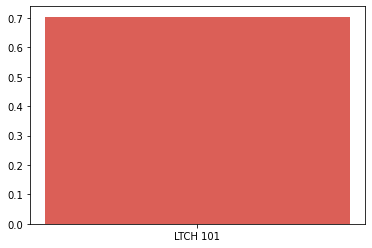

MGT


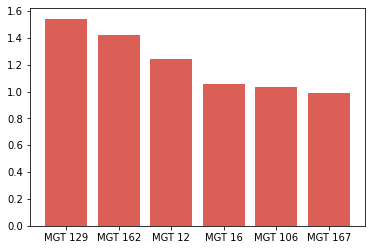

BIPN


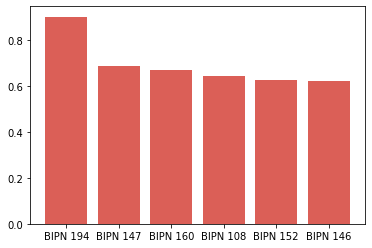

LTLA


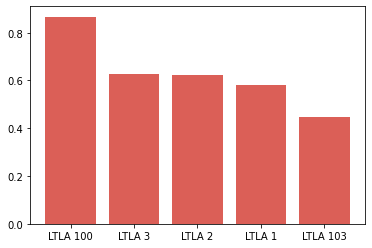

ENVR


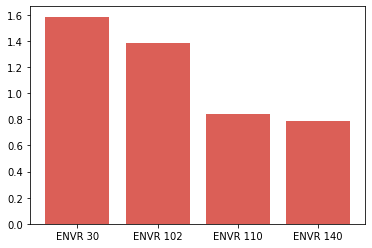

ANBI


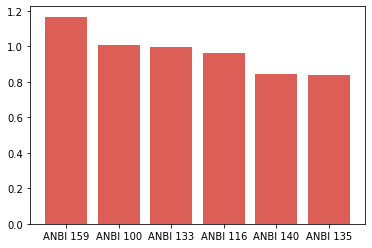

HDS


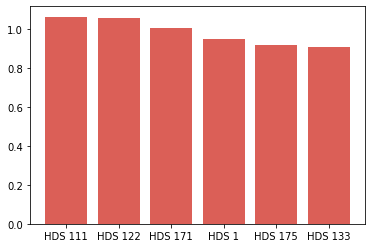

LAWS


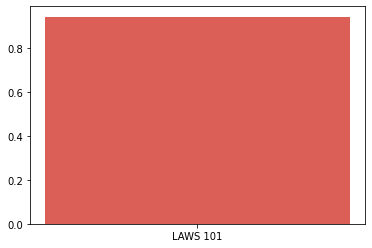

GLBH


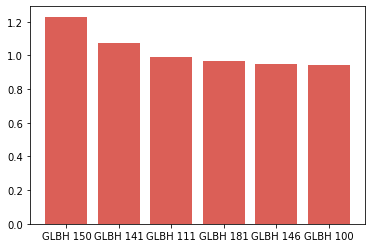

DOC


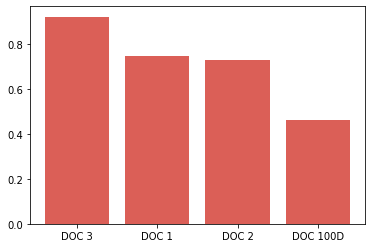

TDHT


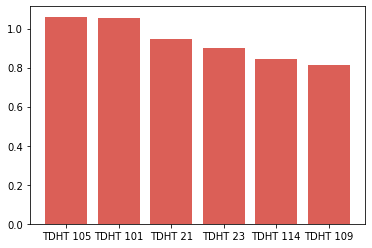

CHEM


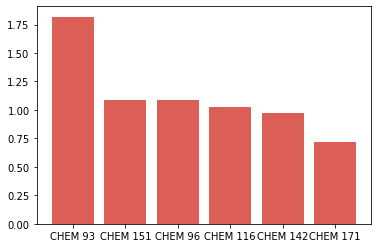

HIUS


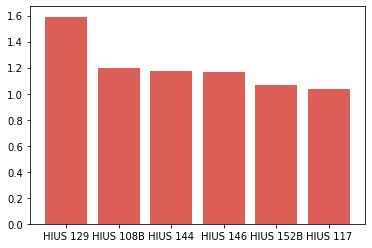

HIEU


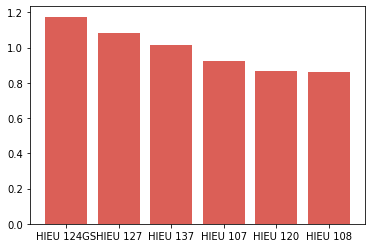

JAPN


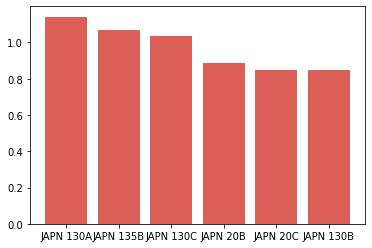

MMW


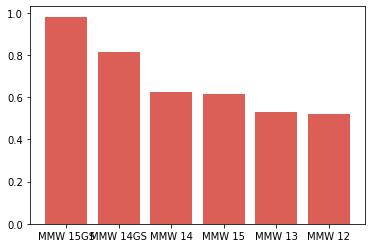

HIEA


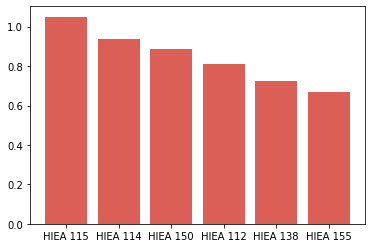

BILD


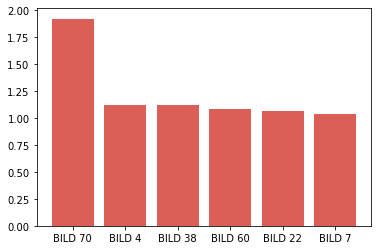

ESYS


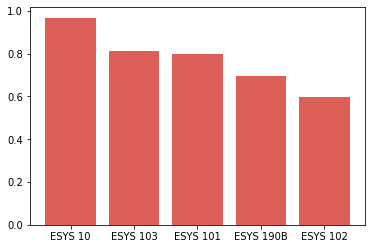

CENG


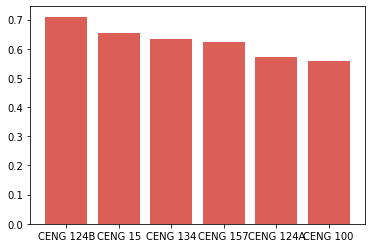

SE


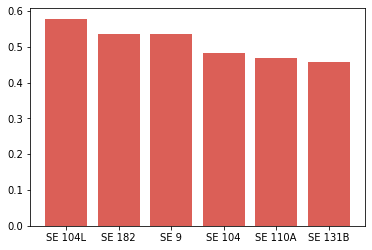

LTFR


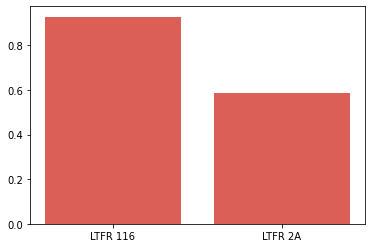

SIO


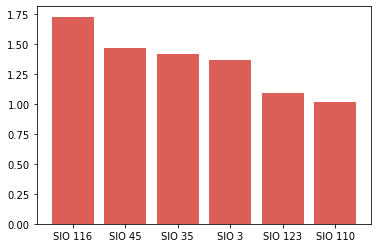

MUS


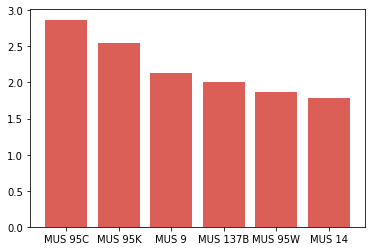

LIHL


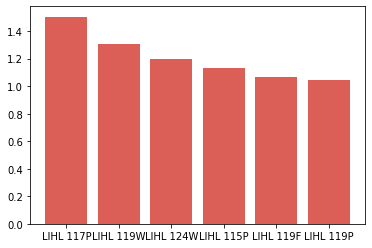

HIAF


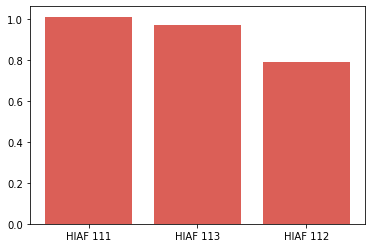

LIGN


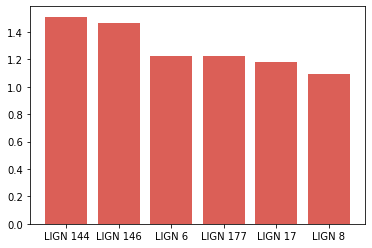

MAE


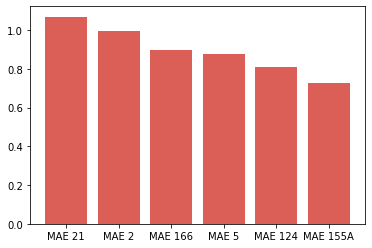

TDGE


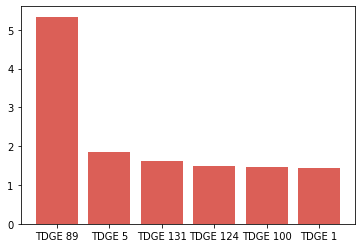

TDPF


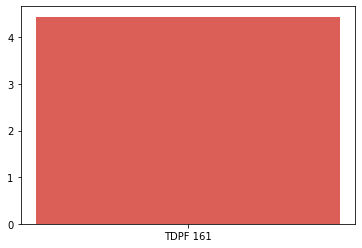

LTWL


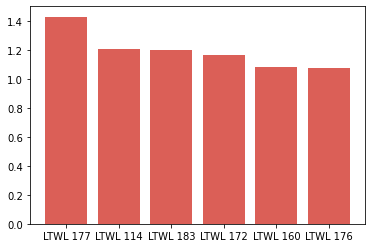

COMM


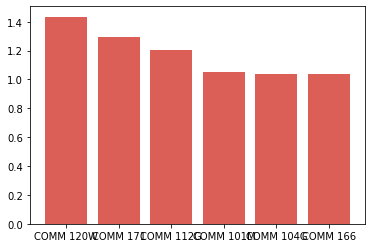

LTKO


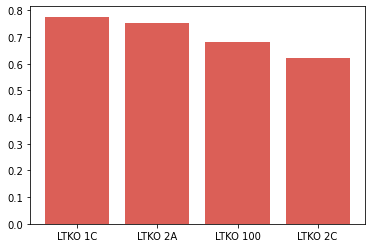

PHYS


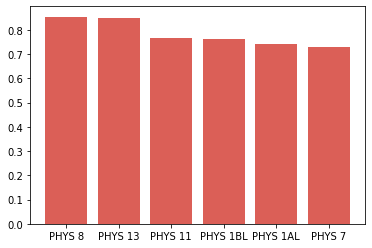

LTEU


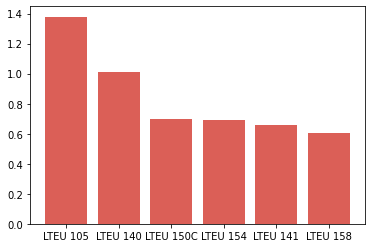

MATH


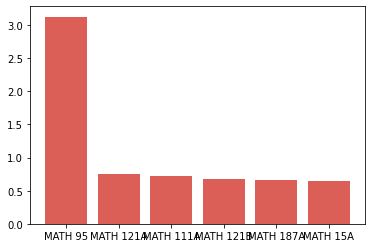

BIBC


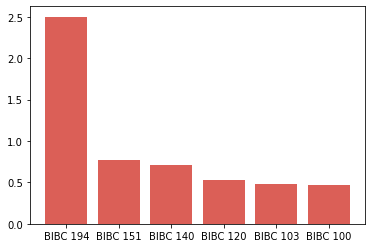

COGS


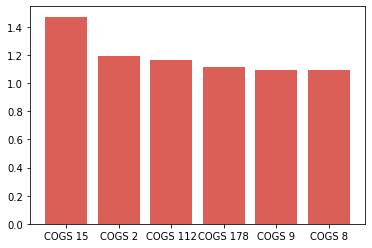

HISC


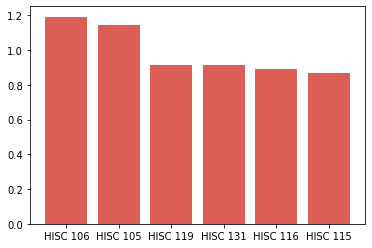

TDMV


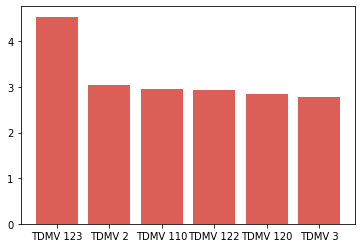

SOCI


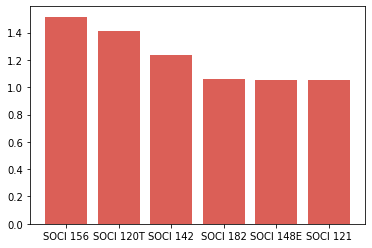

TDTR


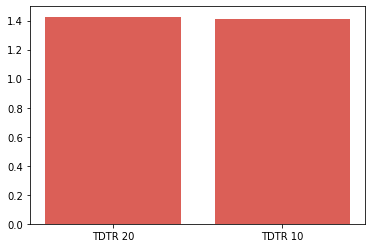

NANO


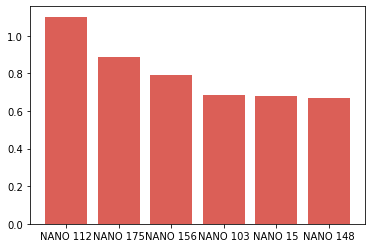

WCWP


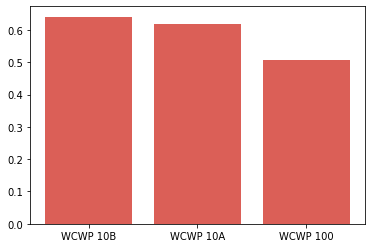

CAT


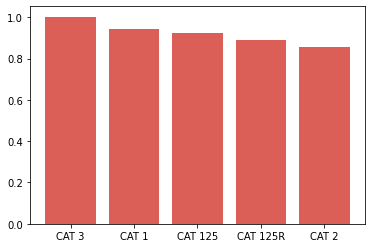

HITO


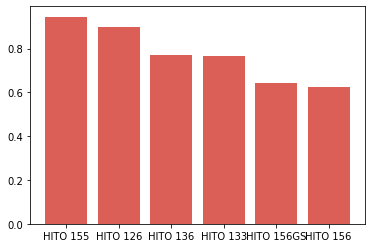

LTAM


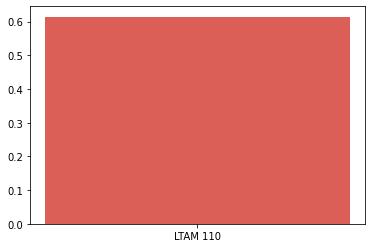

INTL


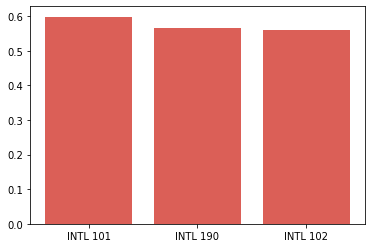

FMPH


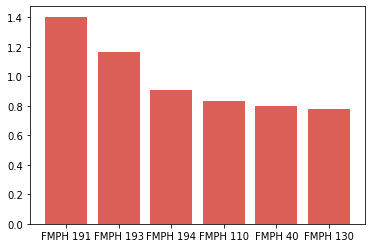

In [33]:
for dep in set(gh_ratio['department'].values):
    gh_ratio_0 = gh_ratio[gh_ratio['department'] == dep].groupby('course').mean().sort_values('ratio', ascending=False)[0:6]# top 6
    gh_ratio_0=gh_ratio_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(gh_ratio_0.course, gh_ratio_0.ratio)
    plt.show()

## Analysis on better instructors

Best instructors by recommendation rate:

In [36]:
insts = df.groupby(['instr'])['rcmnd_instr'].mean()
insts

instr
Aamari, Eddie                 0.702750
Abbasi Hafshejani, Anahita    0.787333
Abbasi, Shaghayegh            1.000000
Abd El-Messih, Andrew Saad    0.744000
Abi Ghanem, Maroun            0.951333
                                ...   
Zuniga, Elina I               0.840667
Zyskowski, Colin A            0.857000
de Callafon, Raymond A        0.683750
de Oliveira, Mauricio         0.709500
duBois, Page Ann              0.908857
Name: rcmnd_instr, Length: 2111, dtype: float64

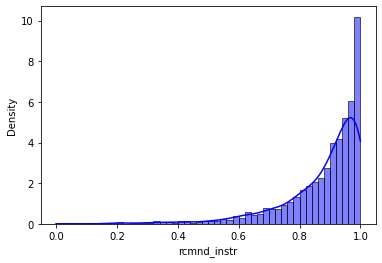

In [38]:
insts=insts.reset_index()
sns.set_palette("hls")
sns.histplot(insts.rcmnd_instr,stat="density",color="b",bins=50,kde=True)
plt.show()

LTGK


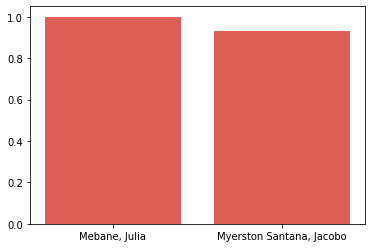

DSC


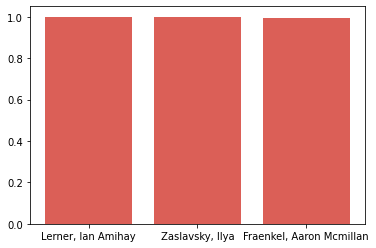

LTWR


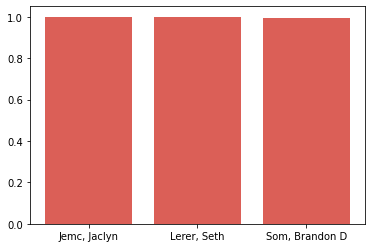

ECON


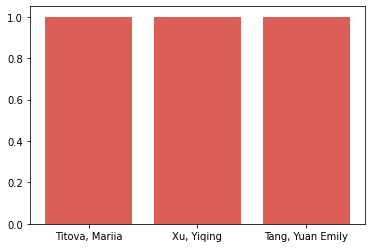

ECE


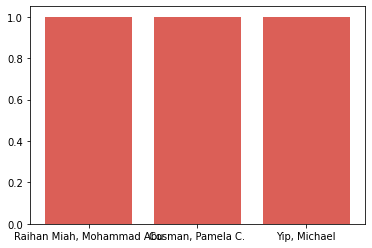

LTEN


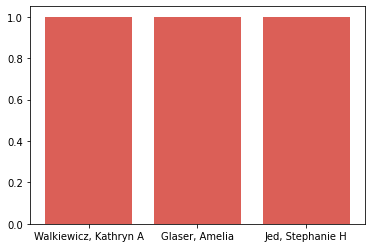

CHIN


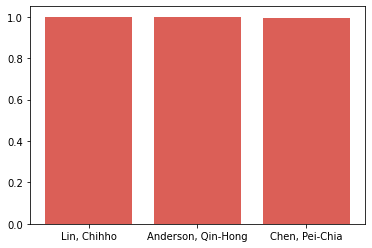

AWP


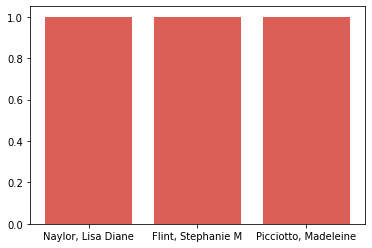

LTEA


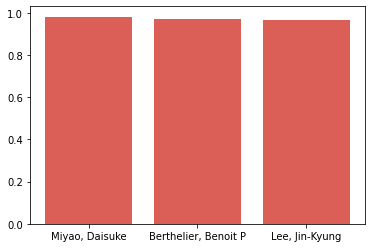

EDS


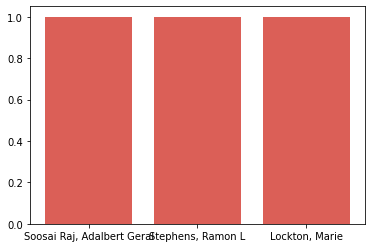

AAS


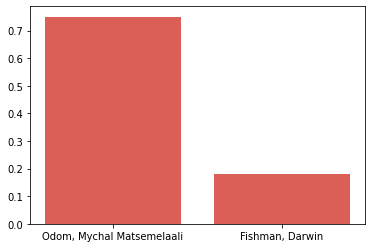

LATI


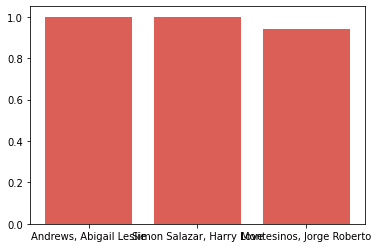

BIMM


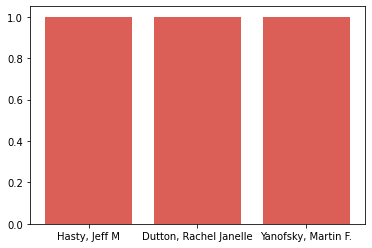

HDP


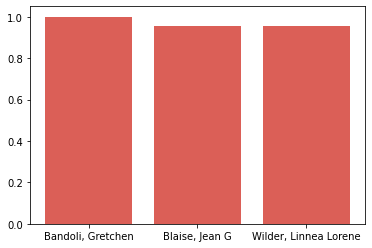

HILD


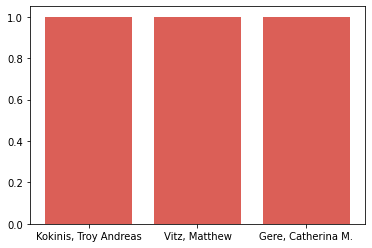

PHIL


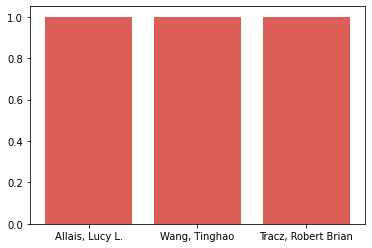

RELI


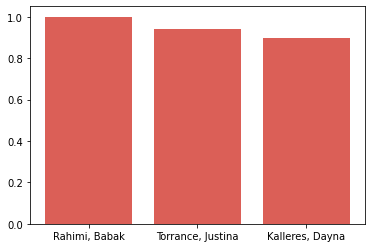

PSYC


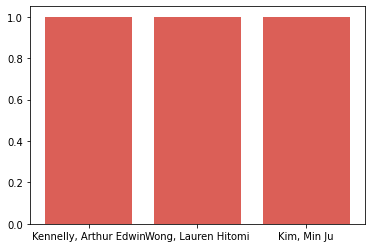

LTIT


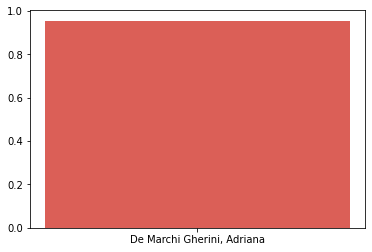

LTRU


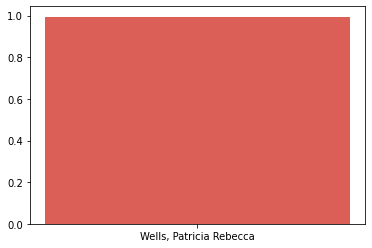

TDDE


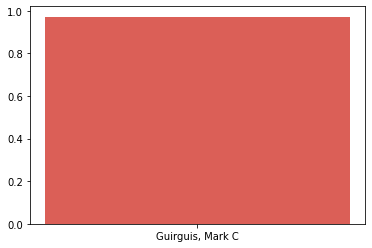

LTCS


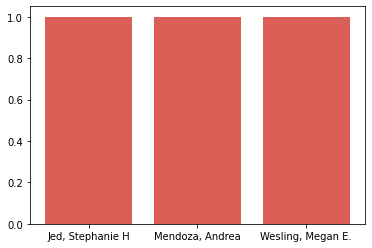

CGS


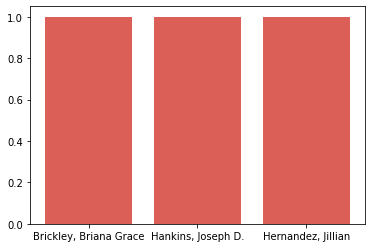

ETHN


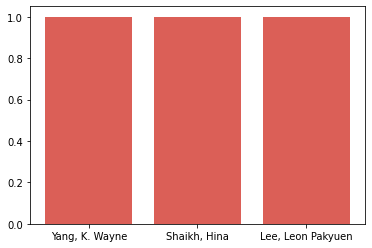

BENG


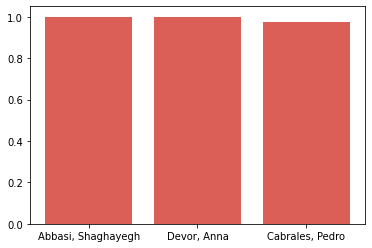

BISP


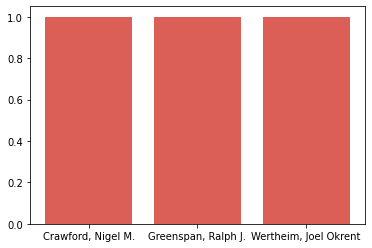

BICD


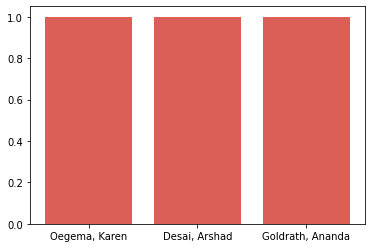

HUM


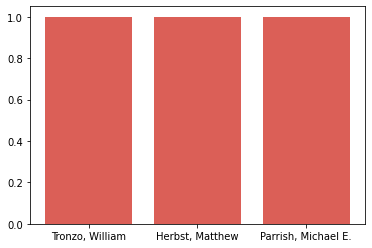

VIS


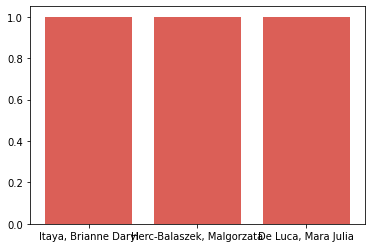

DSGN


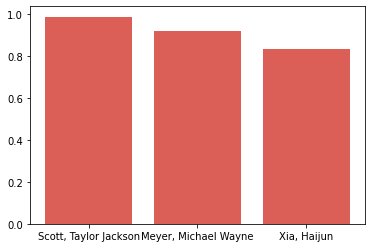

HINE


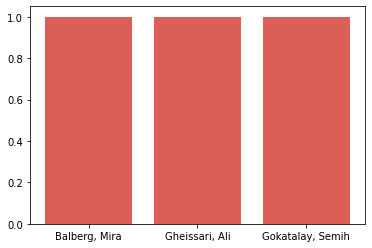

TDPR


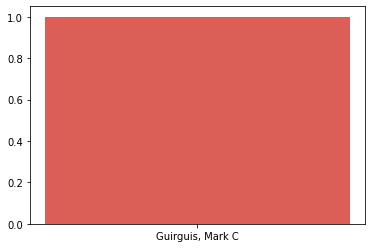

POLI


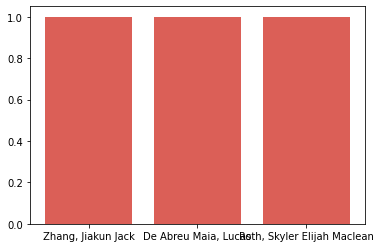

TDDM


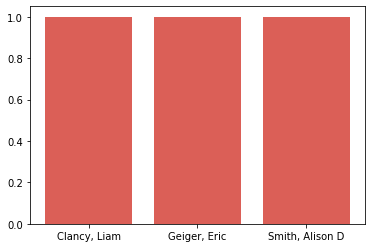

CSS


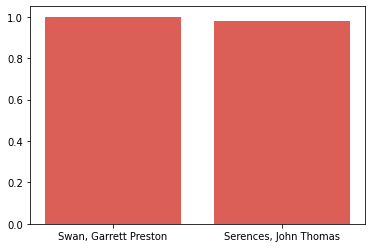

CSE


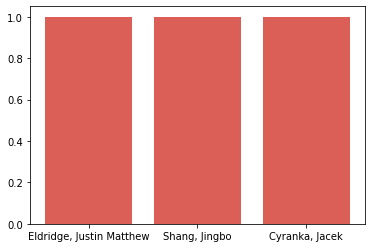

USP


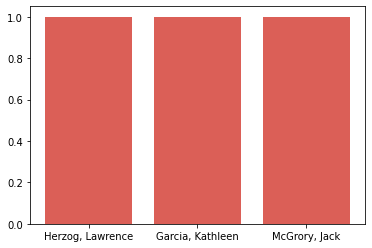

ANSC


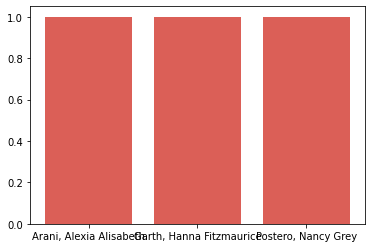

TDAC


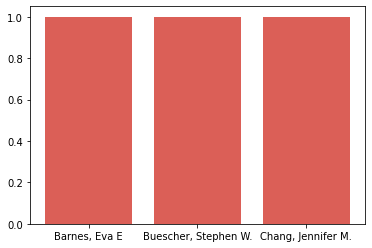

LTTH


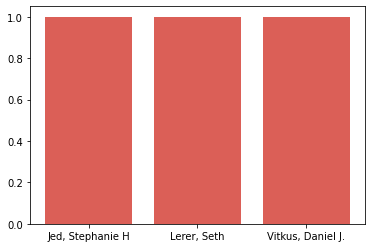

TDPW


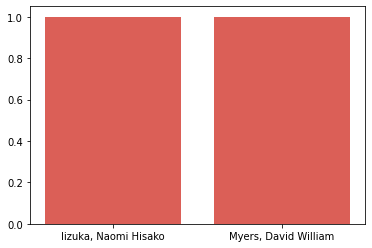

ENG


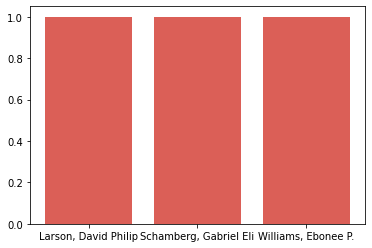

ANAR


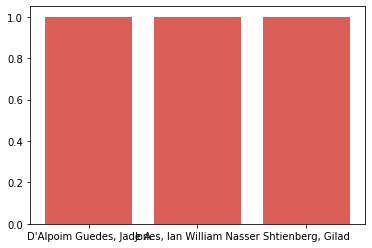

TDDR


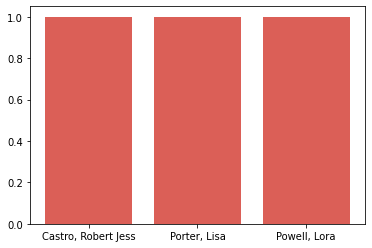

BIEB


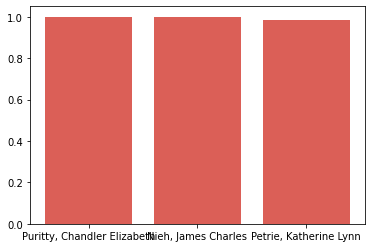

ANTH


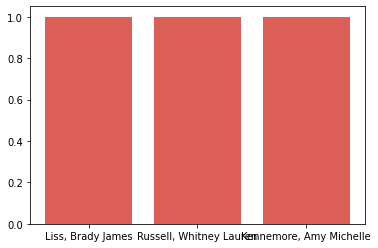

LTGM


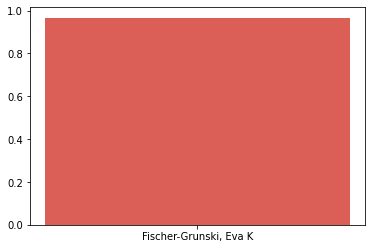

ERC


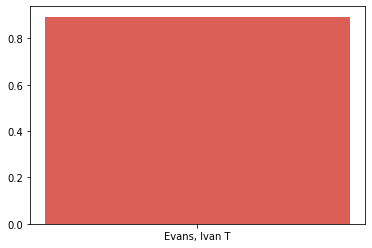

LTSP


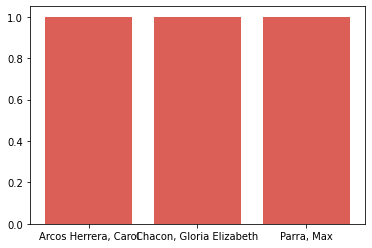

TWS


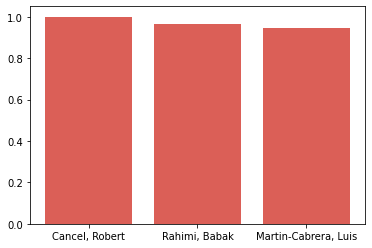

HILA


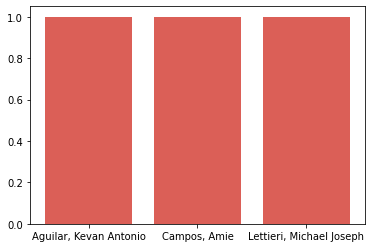

CCS


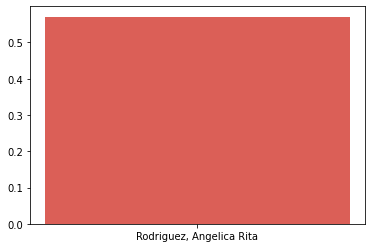

LTCH


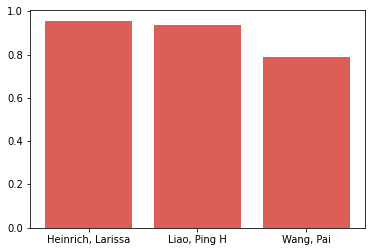

MGT


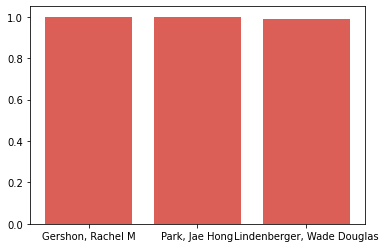

BIPN


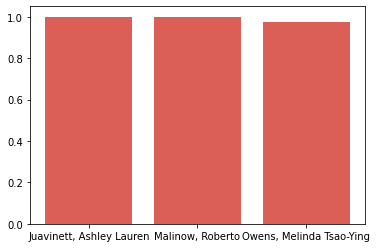

LTLA


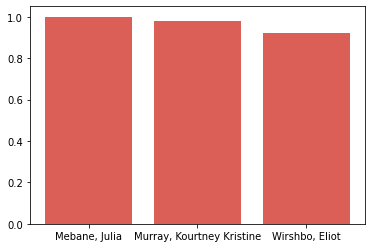

ENVR


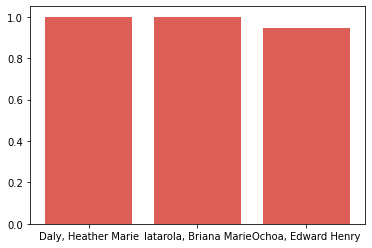

ANBI


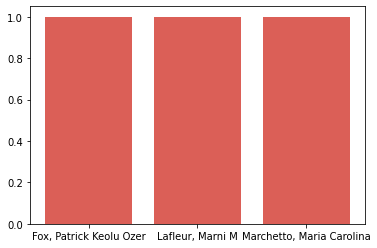

HDS


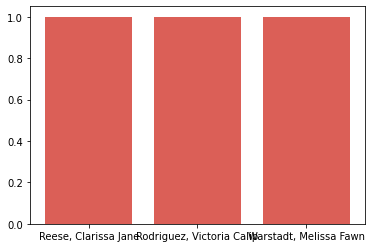

LAWS


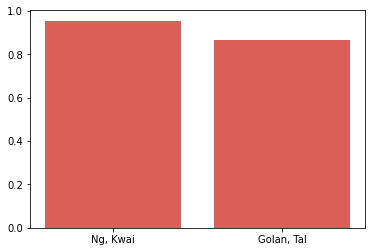

GLBH


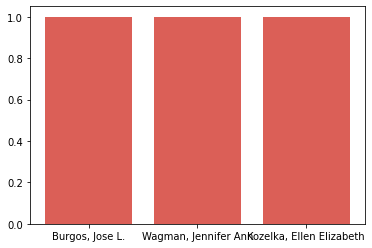

DOC


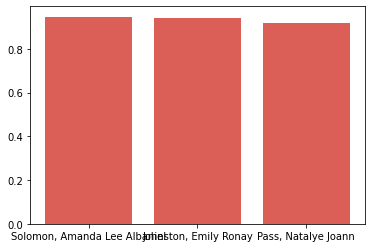

TDHT


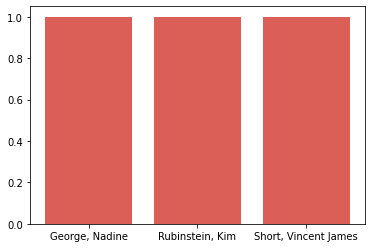

CHEM


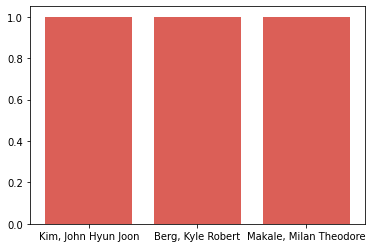

HIUS


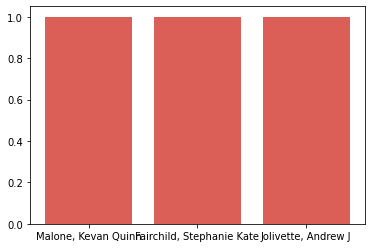

HIEU


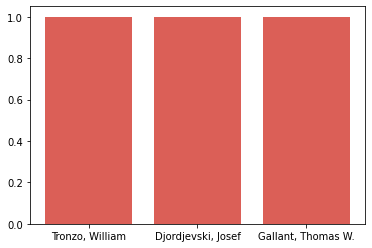

JAPN


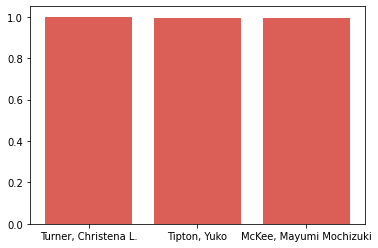

MMW


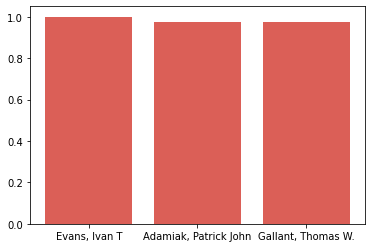

HIEA


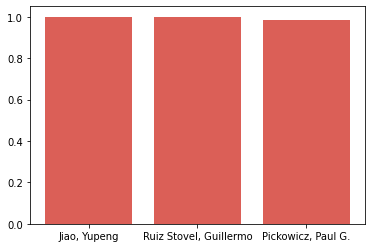

BILD


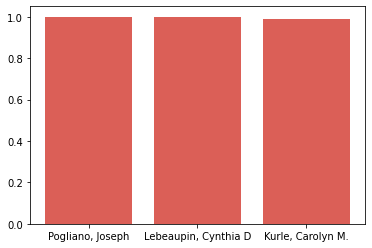

ESYS


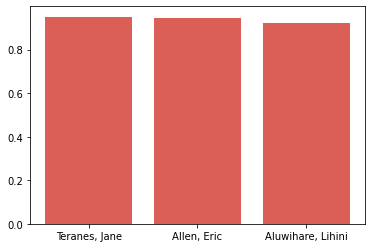

CENG


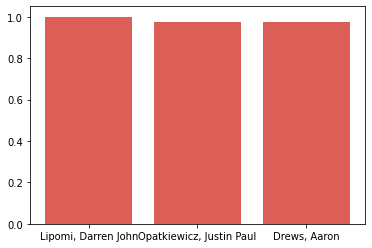

SE


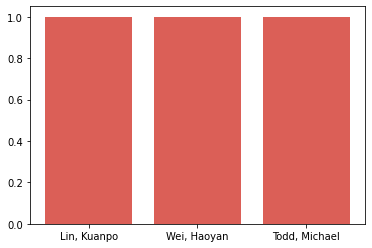

LTFR


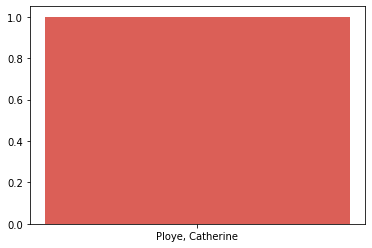

SIO


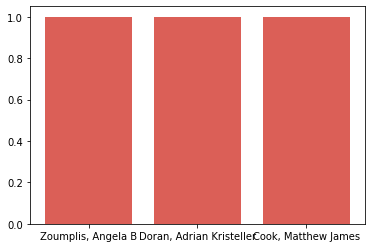

MUS


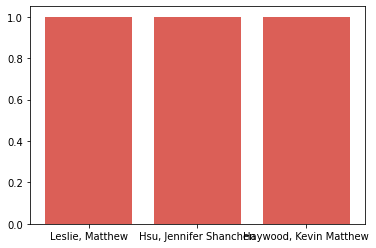

LIHL


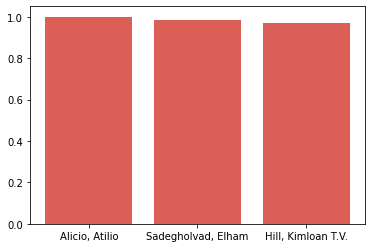

HIAF


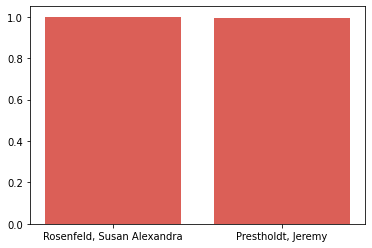

LIGN


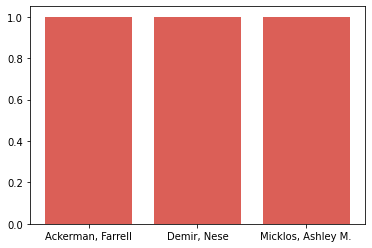

MAE


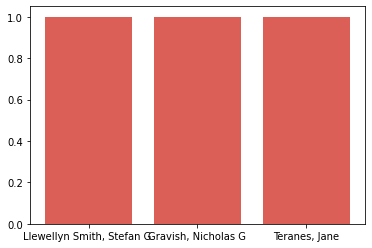

TDGE


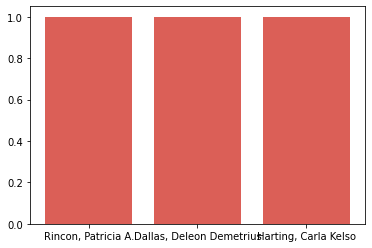

TDPF


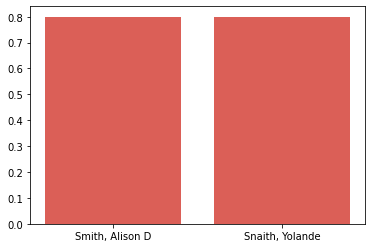

LTWL


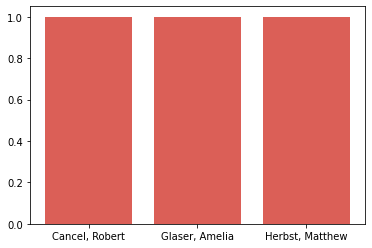

COMM


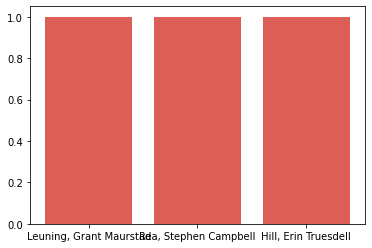

LTKO


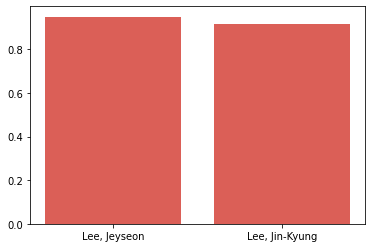

PHYS


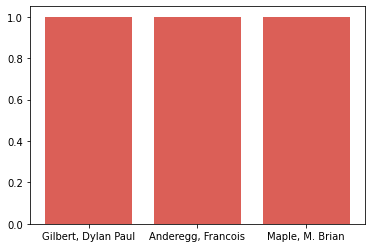

LTEU


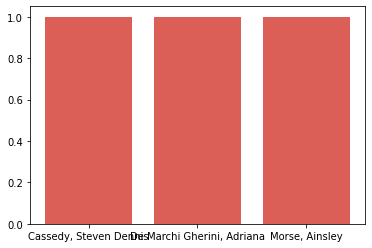

MATH


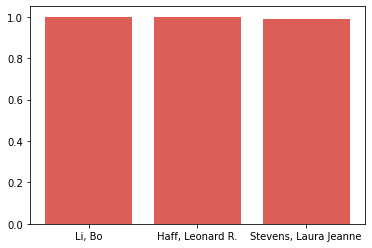

BIBC


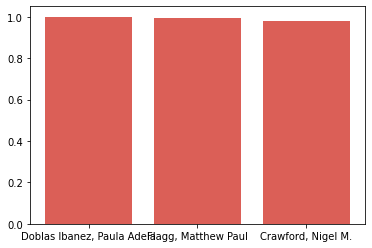

COGS


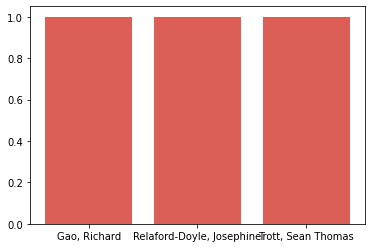

HISC


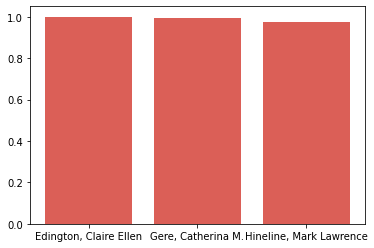

TDMV


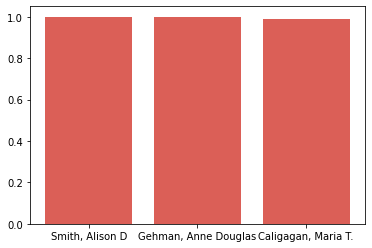

SOCI


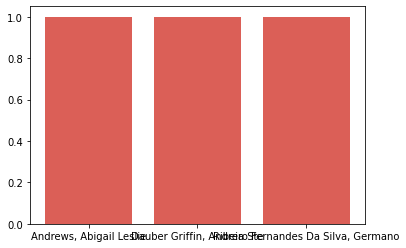

TDTR


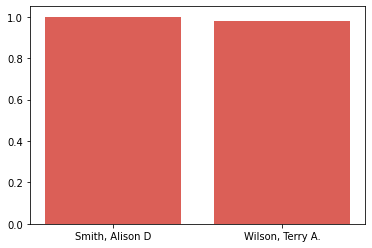

NANO


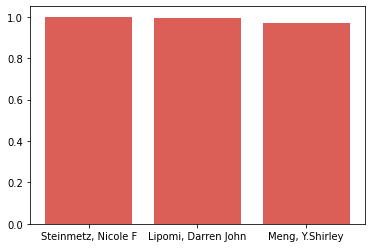

WCWP


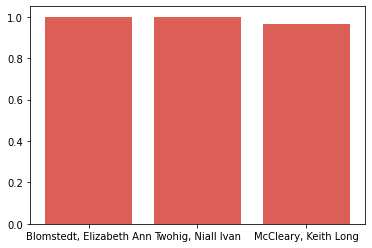

CAT


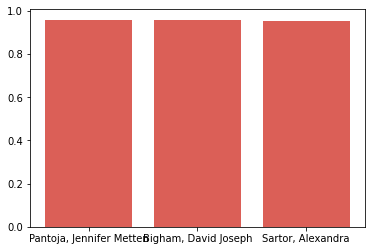

HITO


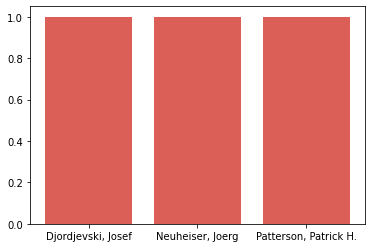

LTAM


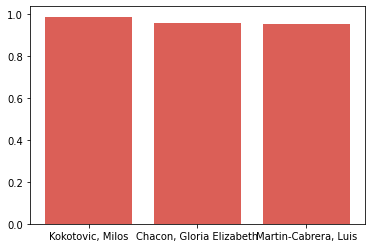

INTL


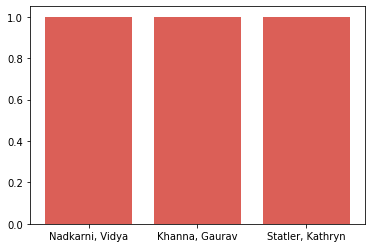

FMPH


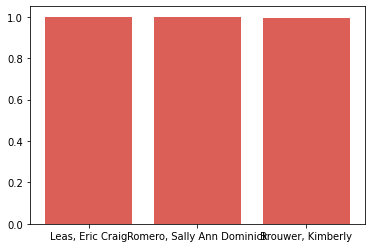

In [39]:
insts = df.copy()
for dep in set(df['department'].values):
    insts_0 = insts[insts['department'] == dep].groupby('instr').mean().sort_values('rcmnd_instr', ascending=False)[0:3]# top 3
    insts_0=insts_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(insts_0.instr, insts_0.rcmnd_instr)
    plt.show()

Best instructors by gpa

In [40]:
insts = df.groupby(['instr'])['gpa_actual'].mean()
insts

instr
Aamari, Eddie                 3.007500
Abbasi Hafshejani, Anahita    3.803333
Abbasi, Shaghayegh            2.700000
Abd El-Messih, Andrew Saad    2.790000
Abi Ghanem, Maroun            3.373333
                                ...   
Zuniga, Elina I               2.760000
Zyskowski, Colin A            3.660000
de Callafon, Raymond A        3.590000
de Oliveira, Mauricio         3.172500
duBois, Page Ann              3.331429
Name: gpa_actual, Length: 2111, dtype: float64

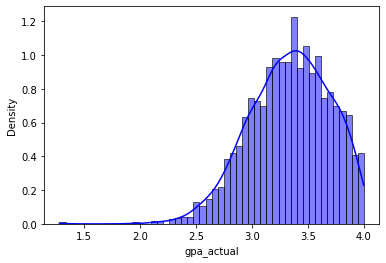

In [41]:
insts=insts.reset_index()
sns.set_palette("hls")
sns.histplot(insts.gpa_actual,stat="density",color="b",bins=50,kde=True)
plt.show()

LTGK


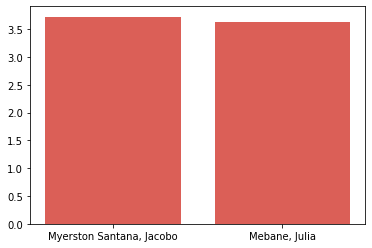

DSC


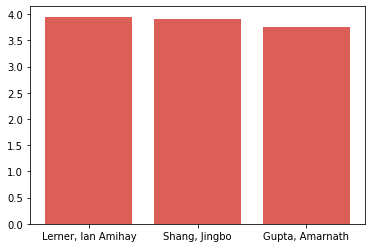

LTWR


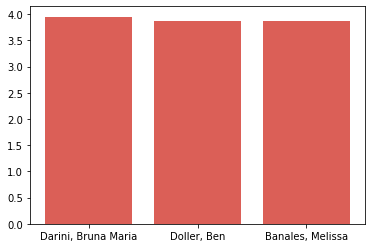

ECON


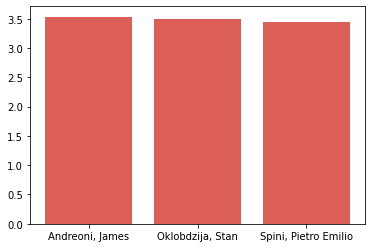

ECE


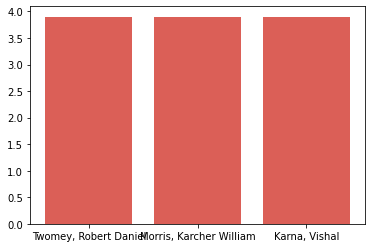

LTEN


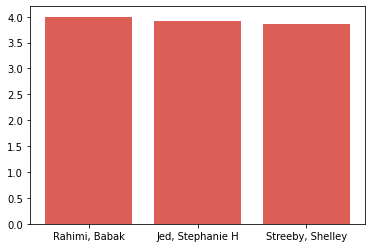

CHIN


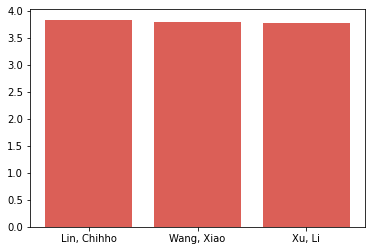

AWP


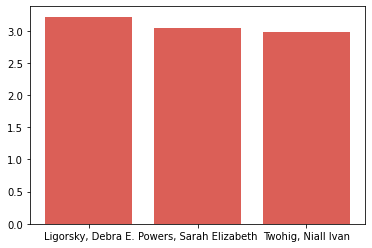

LTEA


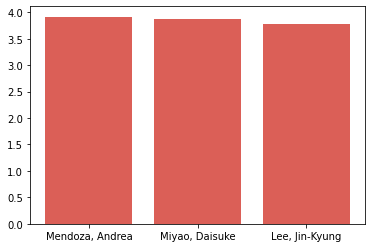

EDS


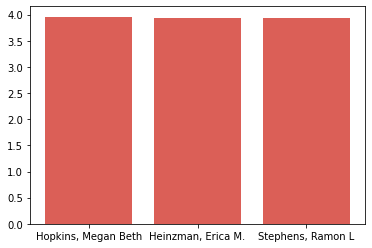

AAS


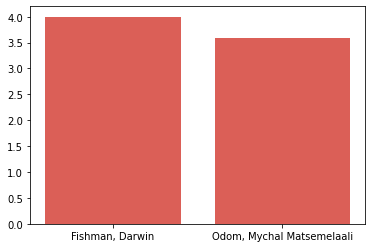

LATI


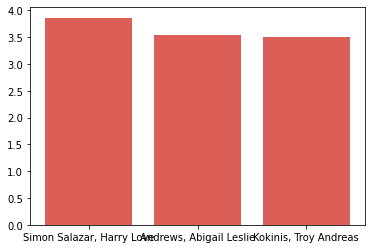

BIMM


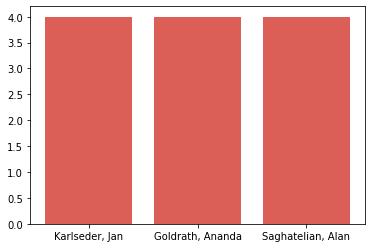

HDP


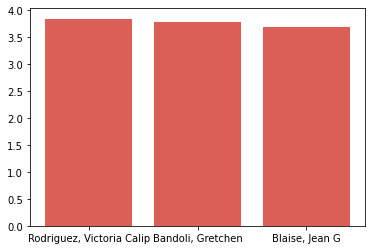

HILD


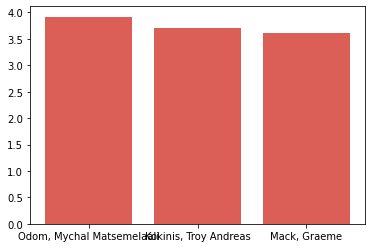

PHIL


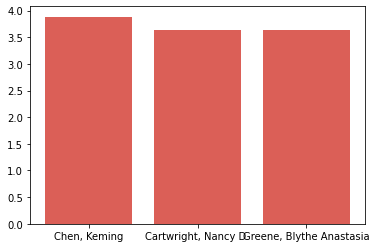

RELI


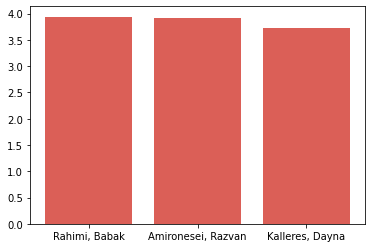

PSYC


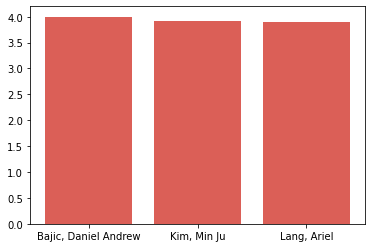

LTIT


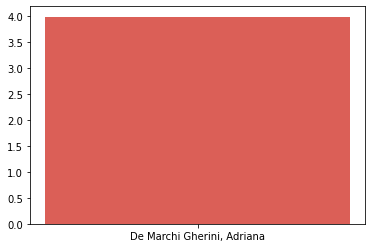

LTRU


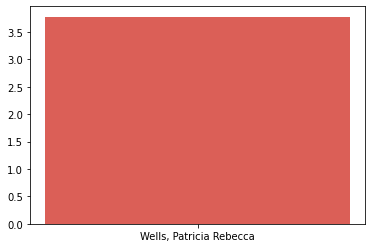

TDDE


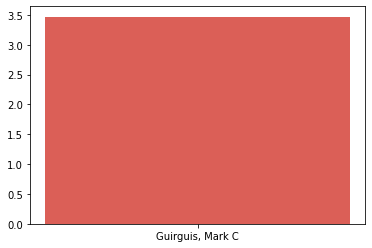

LTCS


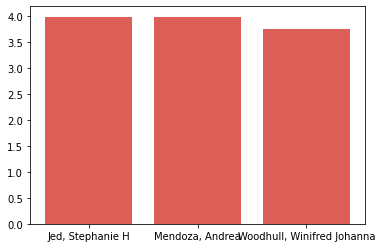

CGS


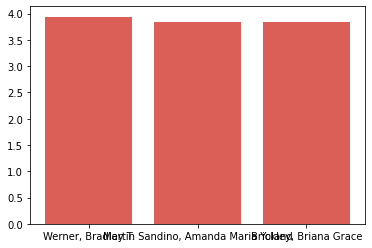

ETHN


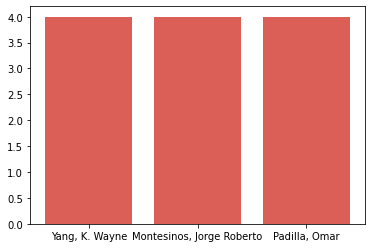

BENG


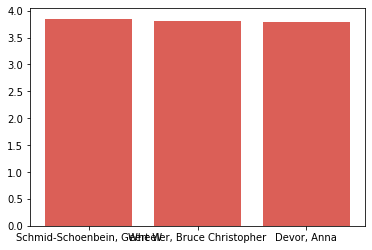

BISP


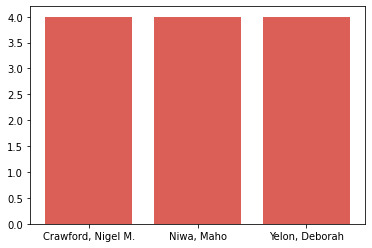

BICD


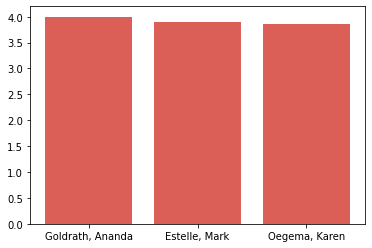

HUM


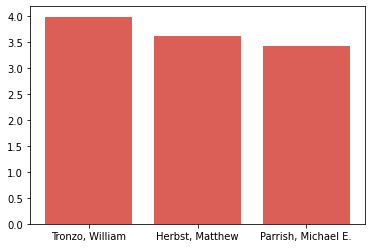

VIS


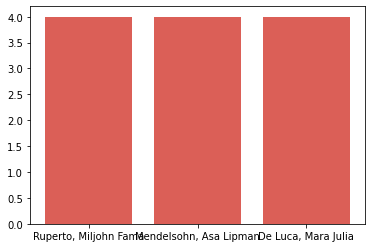

DSGN


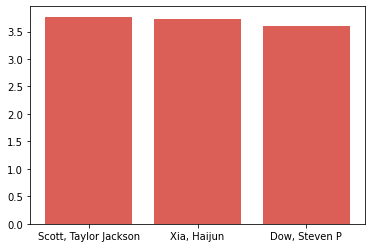

HINE


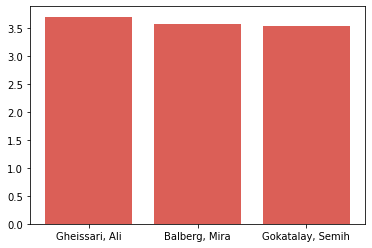

TDPR


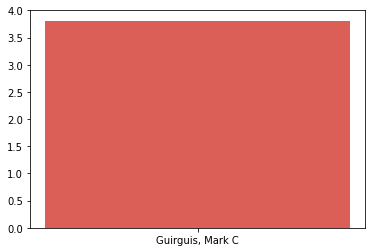

POLI


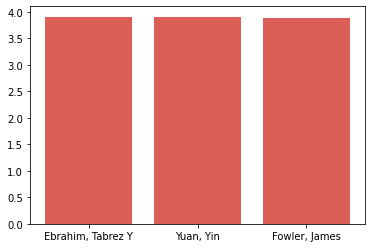

TDDM


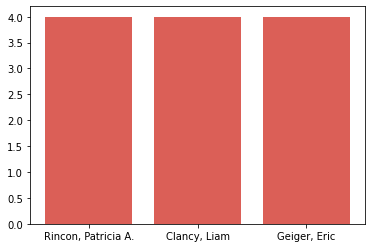

CSS


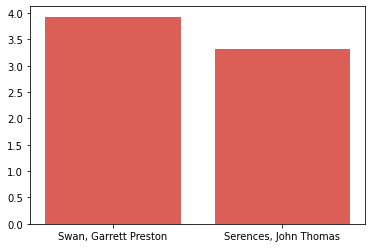

CSE


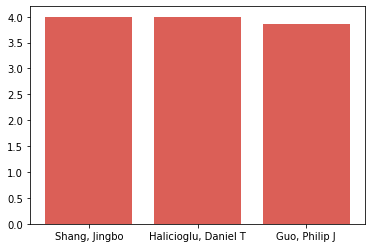

USP


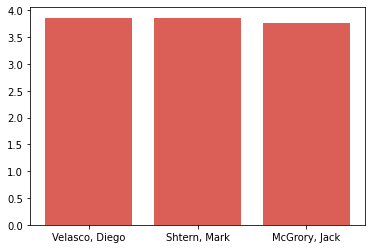

ANSC


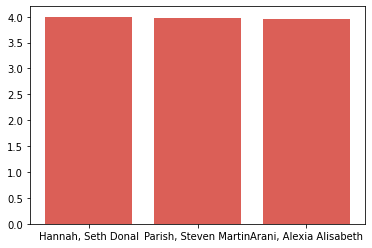

TDAC


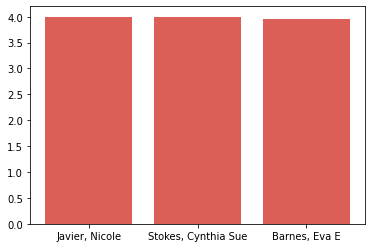

LTTH


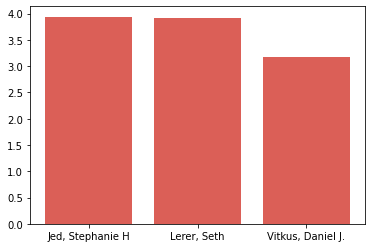

TDPW


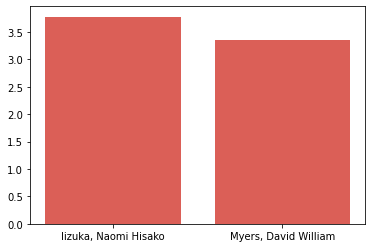

ENG


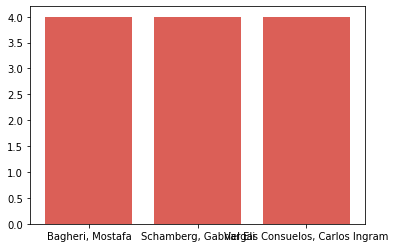

ANAR


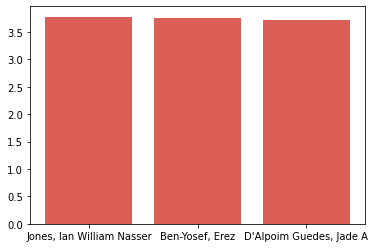

TDDR


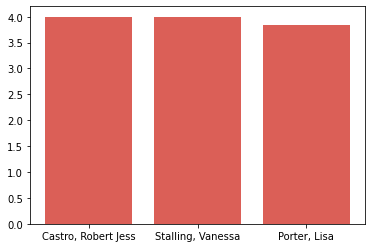

BIEB


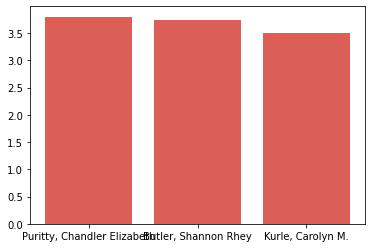

ANTH


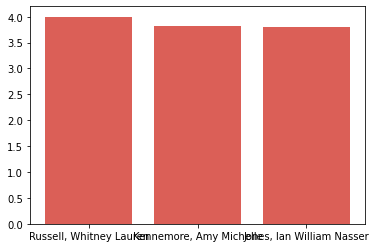

LTGM


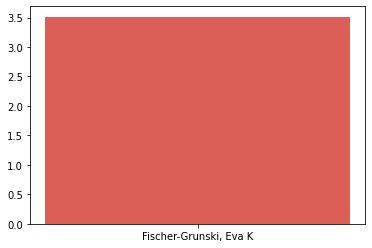

ERC


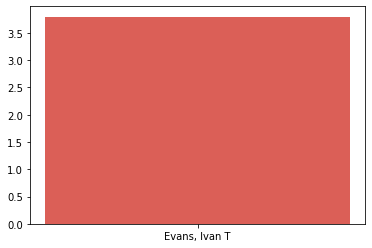

LTSP


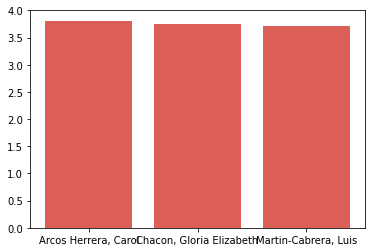

TWS


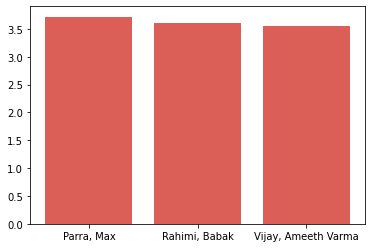

HILA


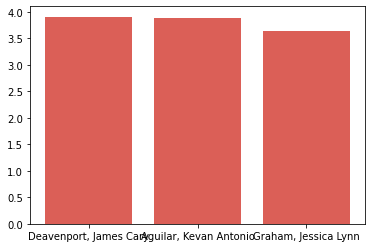

CCS


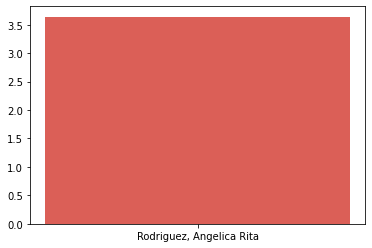

LTCH


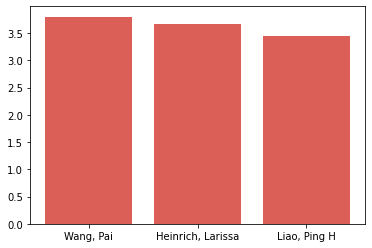

MGT


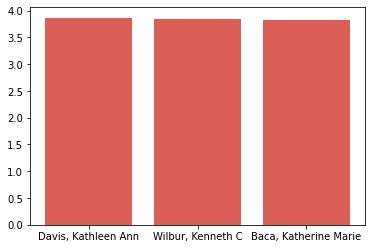

BIPN


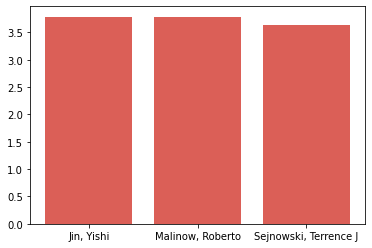

LTLA


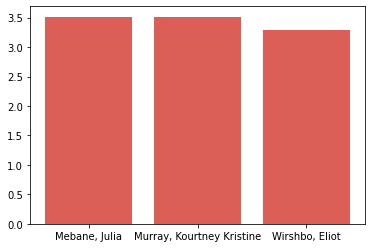

ENVR


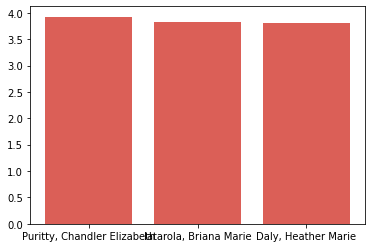

ANBI


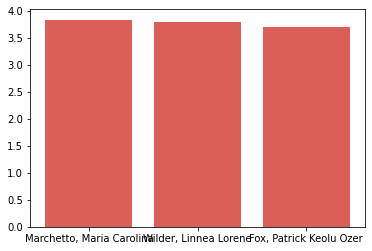

HDS


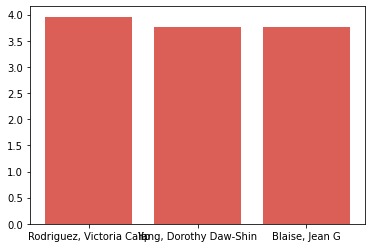

LAWS


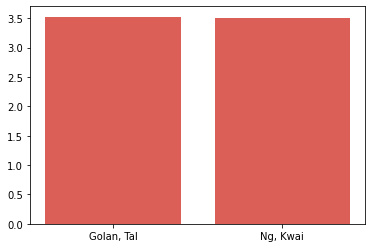

GLBH


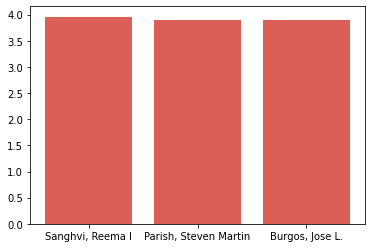

DOC


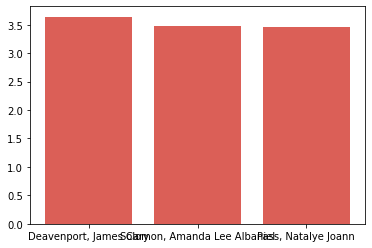

TDHT


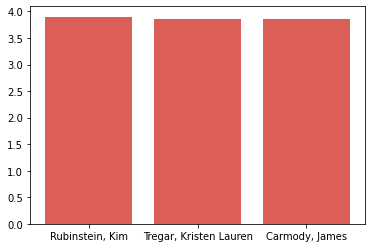

CHEM


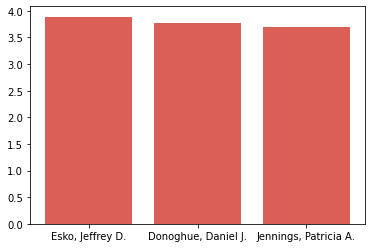

HIUS


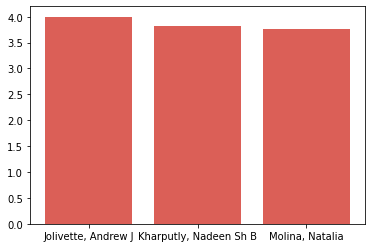

HIEU


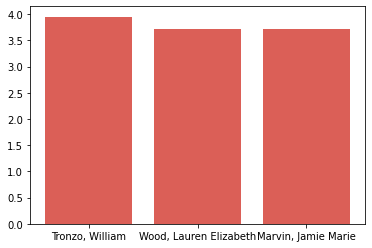

JAPN


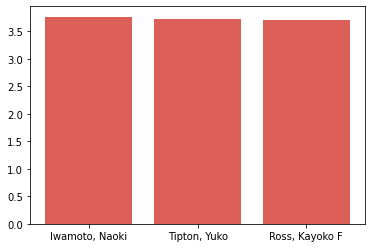

MMW


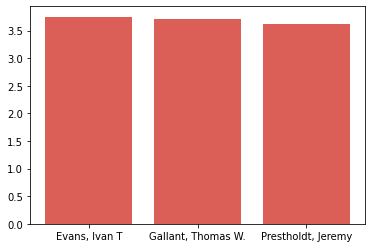

HIEA


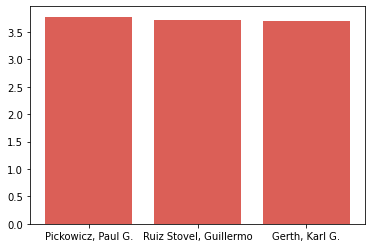

BILD


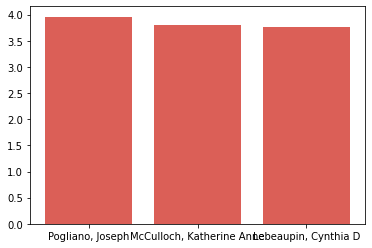

ESYS


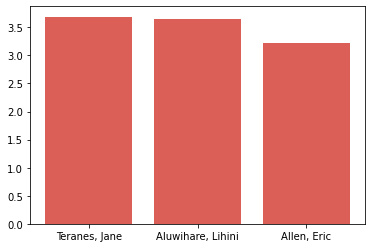

CENG


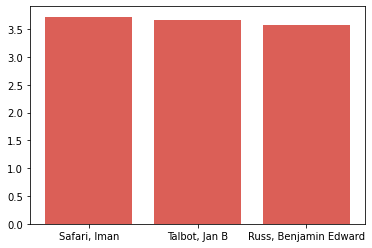

SE


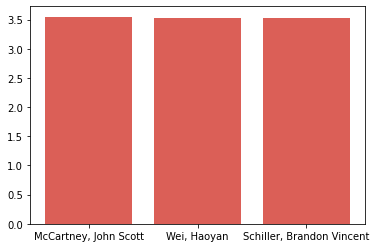

LTFR


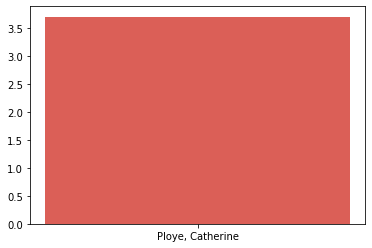

SIO


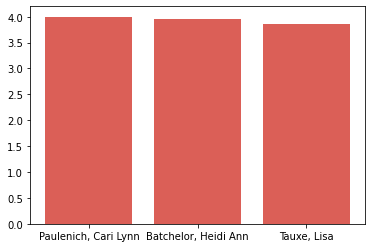

MUS


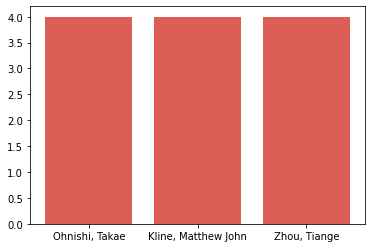

LIHL


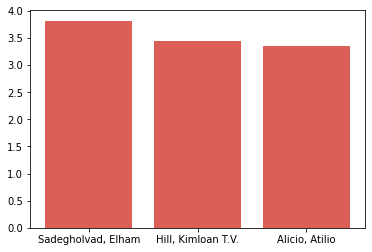

HIAF


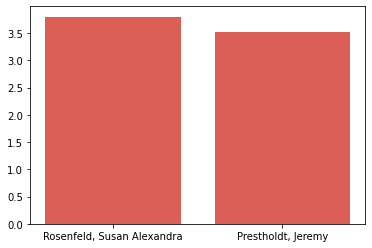

LIGN


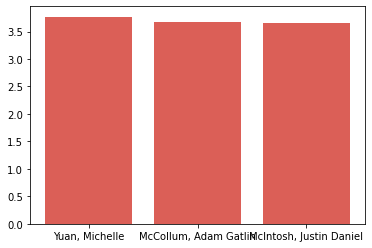

MAE


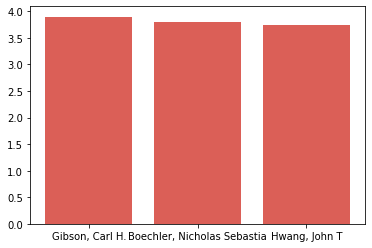

TDGE


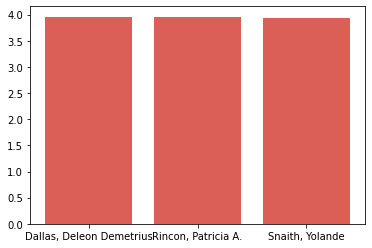

TDPF


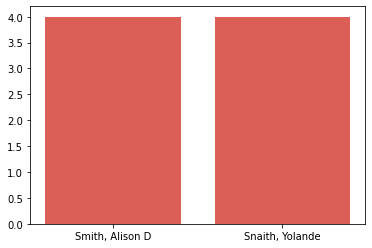

LTWL


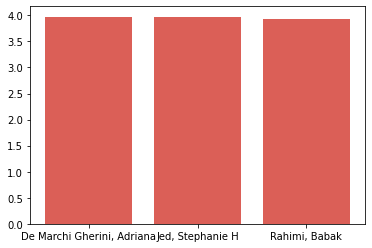

COMM


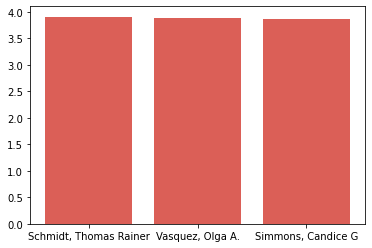

LTKO


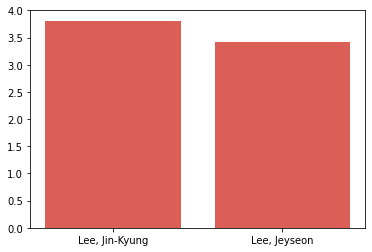

PHYS


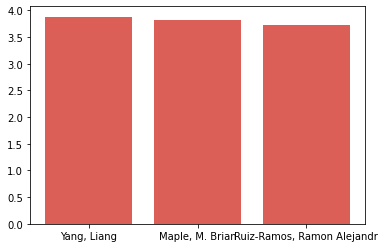

LTEU


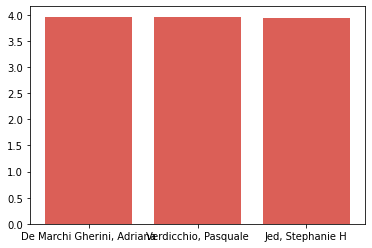

MATH


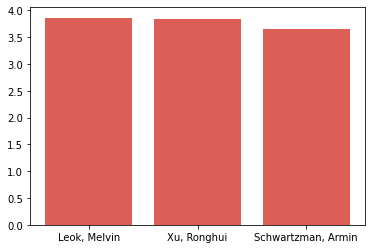

BIBC


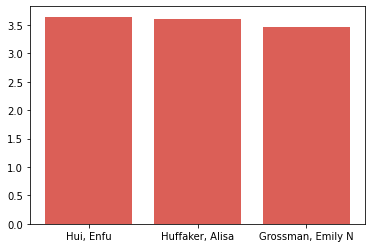

COGS


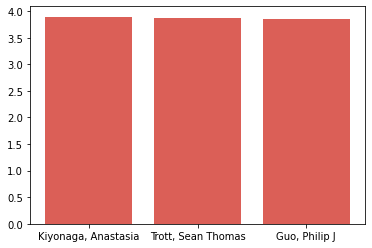

HISC


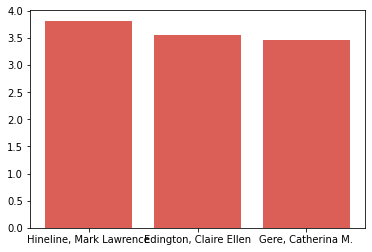

TDMV


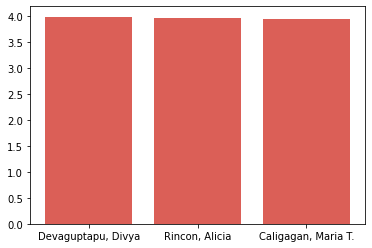

SOCI


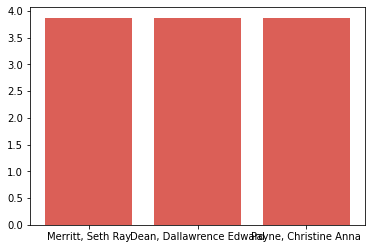

TDTR


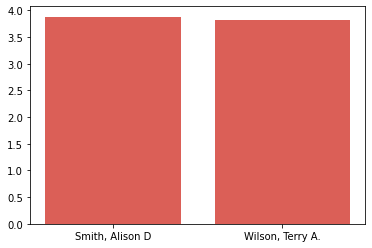

NANO


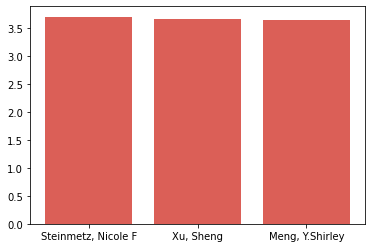

WCWP


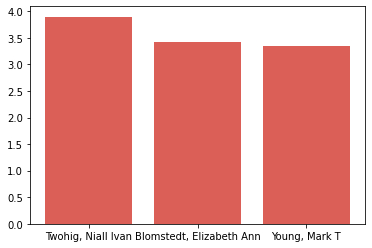

CAT


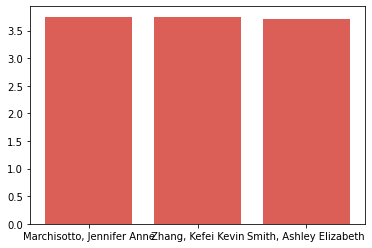

HITO


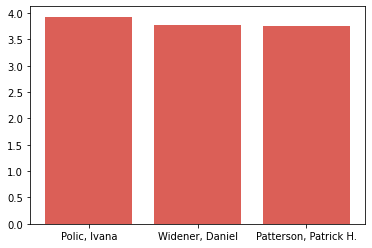

LTAM


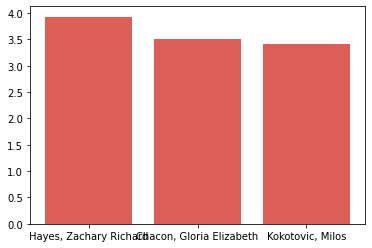

INTL


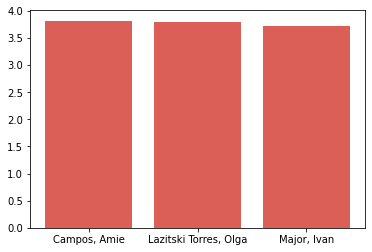

FMPH


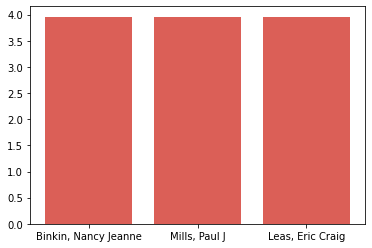

In [42]:
insts = df.copy()
for dep in set(df['department'].values):
    insts_0 = insts[insts['department'] == dep].groupby('instr').mean().sort_values('gpa_actual', ascending=False)[0:3]# top 3
    insts_0=insts_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(insts_0.instr, insts_0.gpa_actual)
    plt.show()